<a href="https://colab.research.google.com/github/Israelamat/Study-and-prediction-of-U.S.-contamination/blob/main/Proyecto_Final_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por qué es relevante estudiar la contaminación del aire y predecirla

La contaminación atmosférica es uno de los principales problemas medioambientales y de salud pública a nivel mundial. Según la Organización Mundial de la Salud (OMS), más del 90% de la población mundial respira aire contaminado, lo que contribuye a más de 7 millones de muertes prematuras al año (OMS, 2018).

En Estados Unidos, a pesar de las políticas regulatorias como la Clean Air Act, todavía existen numerosas regiones que exceden los estándares de calidad del aire, especialmente en áreas urbanas e industriales. La exposición prolongada a contaminantes como el dióxido de nitrógeno (NO₂), ozono (O₃), dióxido de azufre (SO₂) y monóxido de carbono (CO) está asociada a enfermedades respiratorias, cardiovasculares y aumento de hospitalizaciones (EPA, 2021).

Dada la importancia de monitorear y controlar estos contaminantes, surge la necesidad de desarrollar modelos predictivos que permitan anticipar los niveles de contaminación en el futuro. Un modelo de este tipo no solo ayuda a comprender las dinámicas de la calidad del aire, sino que también puede servir como herramienta de apoyo para:

Activar alertas tempranas ante posibles episodios de contaminación grave.

Ayudar a planificar políticas públicas y medidas de mitigación.

Informar a la población vulnerable (niños, ancianos, personas con asma).

Además, el análisis de los datos históricos de contaminación permite explorar la evolución de la calidad del aire a lo largo del tiempo y evaluar si las tendencias actuales son sostenibles o si, por el contrario, seguimos en una trayectoria que podría empeorar los niveles de contaminación en el futuro.

Por tanto, este proyecto tiene como objetivo desarrollar un modelo de predicción de la calidad del aire, utilizando un dataset real de contaminación en Estados Unidos que incluye medidas de cuatro contaminantes principales en distintas localizaciones, fechas y horarios. Este análisis permitirá no solo predecir valores futuros, sino también identificar factores clave que influyen en los niveles de contaminación y aportar una visión sobre el posible impacto de mantener las mismas condiciones en los próximos años.

El estudio de la contaminación del aire a través de técnicas de machine learning es un área activa de investigación (Zhang et al., 2012; Wang & Chen, 2018) y puede proporcionar soluciones complementarias a los sistemas tradicionales de monitoreo mediante modelos estadísticos.

# Bibliografía:

Organización Mundial de la Salud (2018). Ambient air pollution: Health impacts. https://www.who.int/airpollution

United States Environmental Protection Agency (EPA) (2021). Air Quality Trends. https://www.epa.gov/air-trends

Zhang, Y., Bocquet, M., Mallet, V., Seigneur, C., & Baklanov, A. (2012). Real-time air quality forecasting, part I: History, techniques, and current status. Atmospheric Environment, 60, 632-655.

Wang, Y., & Chen, Y. (2018). Air quality forecasting using machine learning algorithms: A review. Current Pollution Reports, 4(2), 104–113.

In [1]:
#Instalamso openml para poder acceder a los datasets
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.8 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=f3a5bf904a371cd4625290c5f98fa0269e8348867d2f5f51515c4565c8a5e048
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [2]:
# Importamos openml para cargar el dataset en cuestion
# Enlace al dataset; https://www.openml.org/search?type=data&status=active&id=43586
import openml
dataset = openml.datasets.get_dataset(43586)
print(type(dataset))

<class 'openml.datasets.dataset.OpenMLDataset'>


In [3]:
# Lo transformamos al formato CSV para poder trabajar de una forma mas comoda
X, y, attribute_names, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')
df = X.copy()
df[dataset.default_target_attribute] = y

# Ver primeras filas
print(df.head())
df_raw = df.copy()

   Unnamed:_0  State_Code  County_Code  Site_Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date_Local          NO2_Units  ...  SO2_Mean  SO2_1st_Max_Value  \
0  2000-01-01  Parts per billion  ...  3.000000                9.0   
1  2000-01-01  Parts per billion  ...  3.000000                9.0   
2  2000-01-01  Parts per billion

# Análisis del dataset

1. El linaje de los datos se refiere a la historia de las transformaciones y manipulaciones que los datos han sufrido desde su origen hasta su estado actual. En este caso, hemos revisado el dataset y no se han encontrado problemas evidentes que indiquen manipulaciones incorrectas o inconsistencias en los datos. Los registros parecen seguir un formato coherente, y las columnas corresponden a medidas de contaminación del aire en diferentes ubicaciones de Estados Unidos, con variables bien definidas como niveles de NO2, O3, SO2, CO, entre otros. No hay indicios de que los datos hayan sido alterados de manera inapropiada.

2. La licencia del dataset es libre de restricciones para uso académico y de investigación, lo que permite que sea utilizado para proyectos educativos, modelado de predicción, y análisis sin la necesidad de pagar o solicitar permisos adicionales. Este tipo de licencia también facilita la distribución y el uso del dataset, permitiendo que sea compartido y modificado por otros usuarios con fines similares. Aseguramos que, según la fuente del dataset (probablemente OpenML o Kaggle), este tiene licencia abierta, lo que lo hace adecuado para proyectos de modelado y análisis.

Con 1 millón de registros y 30 columnas, el dataset es bastante adecuado para el desarrollo de un modelo de regresión en el que se busca predecir la calidad del aire en función de las variables disponibles. Teniendo en cuenta que el número de filas es grande, este volumen de datos proporciona una base sólida para entrenar el modelo sin riesgo de sobreajuste, siempre que las características utilizadas sean relevantes.

En cuanto a las carterísticas, 30 columnas no es un número excesivo en comparación con la cantidad de datos. De hecho, un número moderado de características en un dataset grande generalmente es manejable y permite construir modelos robustos y eficientes. Sin embargo, es importante aplicar un análisis de correlación y de relevancia de las características para asegurar que no haya variables redundantes o irrelevantes que puedan afectar el rendimiento del modelo.


# Análisis de datos exploratorio

In [4]:
# Aqui pondremos los modulos que usaremos para el analisis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis

In [5]:


# Mostrar el tamaño (dimensión) del dataset: número de filas y columnas
print("Tamaño del dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(df.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cuántos son
print("Número de valores nulos por columna:")
print(df.isnull().sum())
print()

# Eliminamos la columna llamada 'None'
# Esta columna contiene valores irrelevantes ("NONE") que no aportan ningún valor
# Al eliminarla, mejoramos la eficiencia del modelo y reducimos la
# dimensionalidad del dataset.
df = df.drop(columns=[None])

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas después de la eliminación:", df.columns)

##################################################################################3

# Verificar si existen columnas completamente vacías (todas sus celdas nulas)
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vacías (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vacías.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son numéricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(df.dtypes)
print()

# Mostrar un resumen estadístico básico de todas las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(df.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# Análisis detallado de las características numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Características numéricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable numérica: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")
    print()

# Análisis detallado de las características categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categórica: {col}")
    print(f"Número de categorías: {df[col].nunique()}")
    print(f"Moda (categoría más frecuente): {df[col].mode()[0]}")
    print()

Tamaño del dataset:
Número de filas: 1746661
Número de columnas: 30

Columnas del dataset:
Index([       'Unnamed:_0',        'State_Code',       'County_Code',
                'Site_Num',           'Address',             'State',
                  'County',              'City',        'Date_Local',
               'NO2_Units',          'NO2_Mean', 'NO2_1st_Max_Value',
        'NO2_1st_Max_Hour',           'NO2_AQI',          'O3_Units',
                 'O3_Mean',  'O3_1st_Max_Value',   'O3_1st_Max_Hour',
                  'O3_AQI',         'SO2_Units',          'SO2_Mean',
       'SO2_1st_Max_Value',  'SO2_1st_Max_Hour',           'SO2_AQI',
                'CO_Units',           'CO_Mean',  'CO_1st_Max_Value',
         'CO_1st_Max_Hour',            'CO_AQI',                None],
      dtype='object')

Número de valores nulos por columna:
Unnamed:_0                 0
State_Code                 0
County_Code                0
Site_Num                   0
Address                    0
Sta

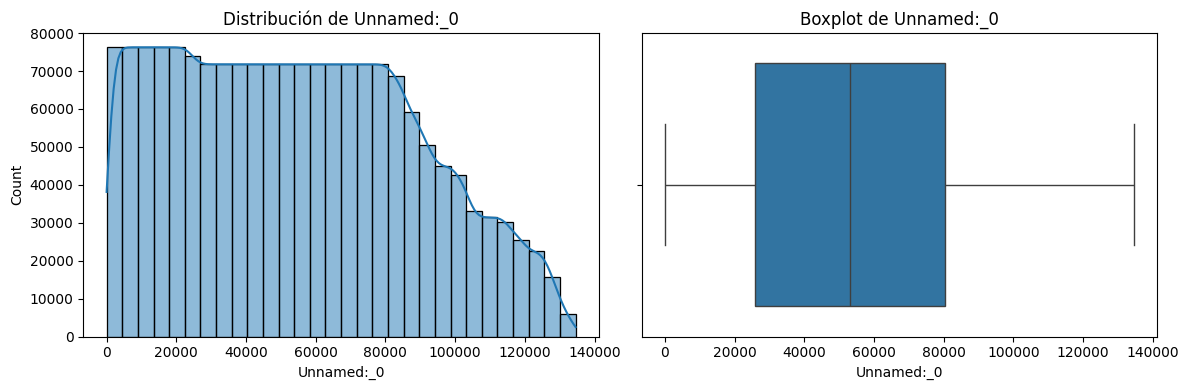

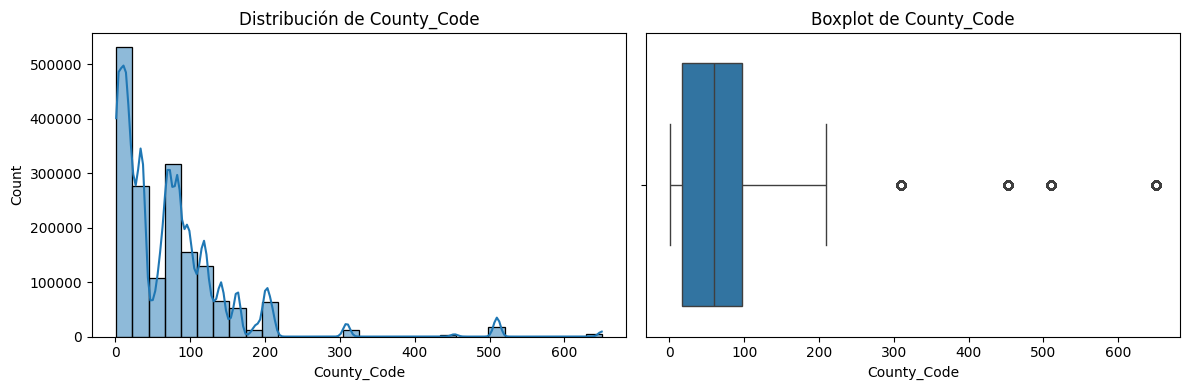

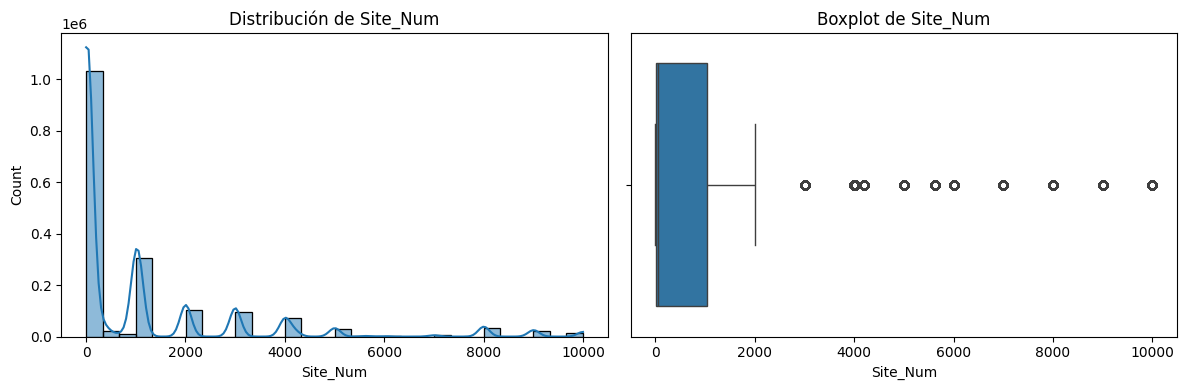

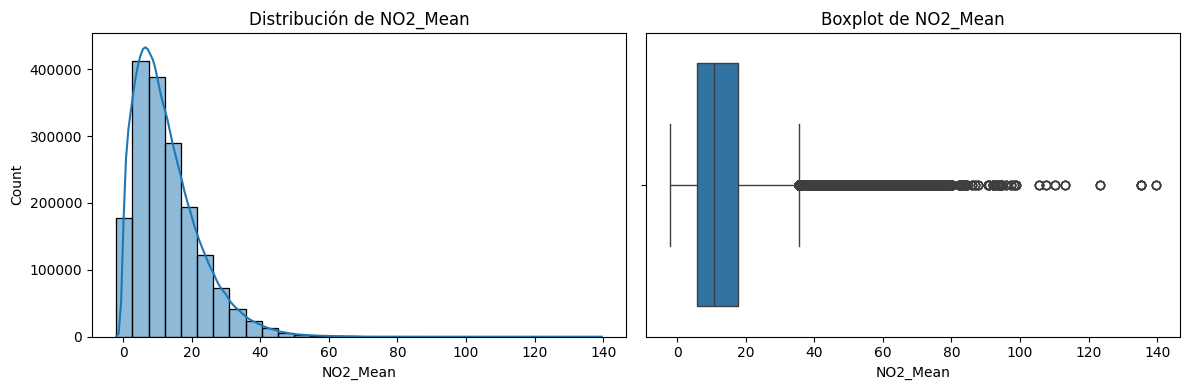

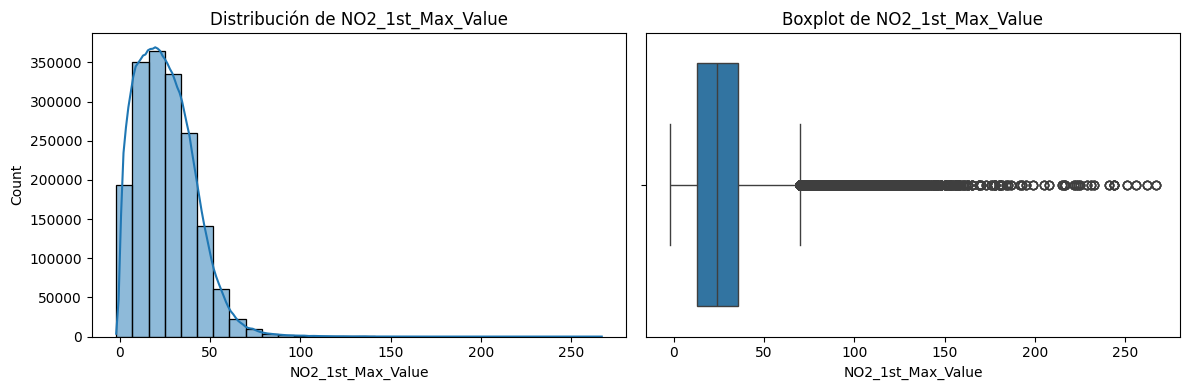

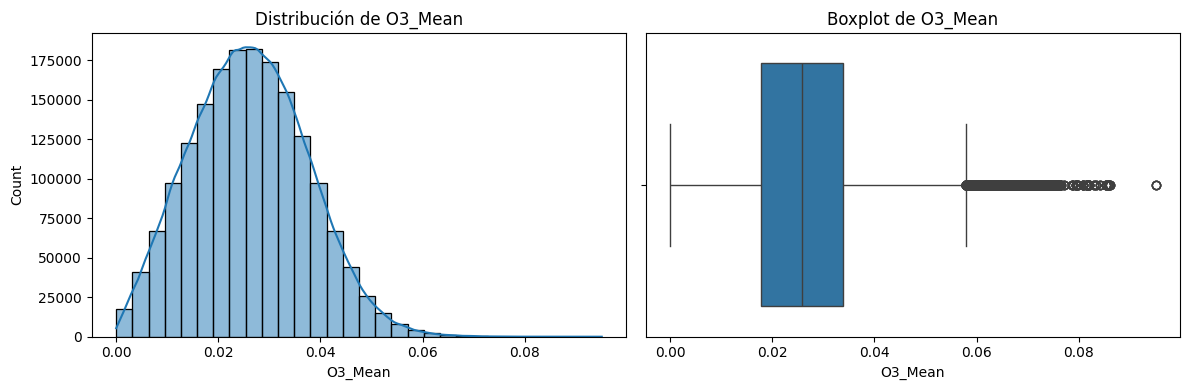

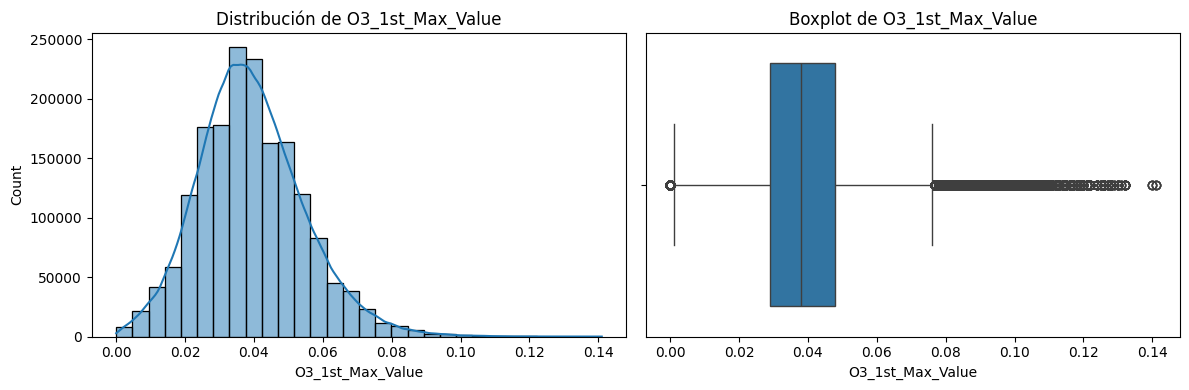

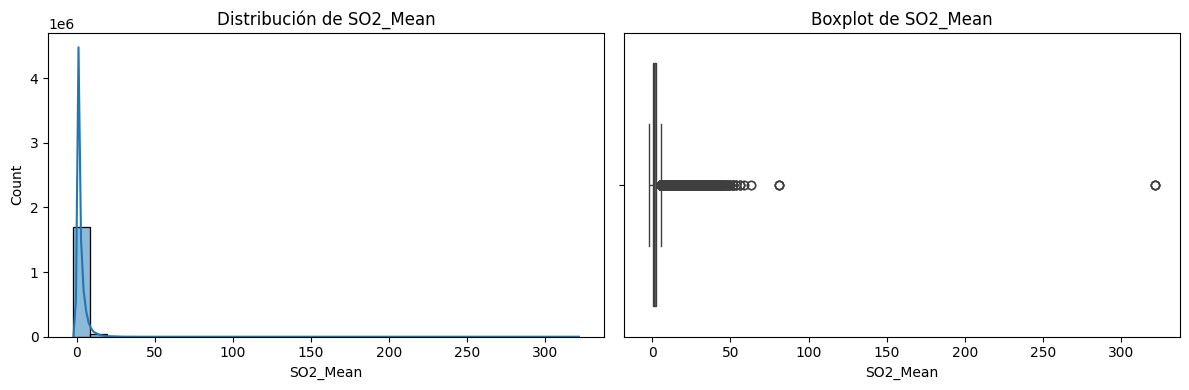

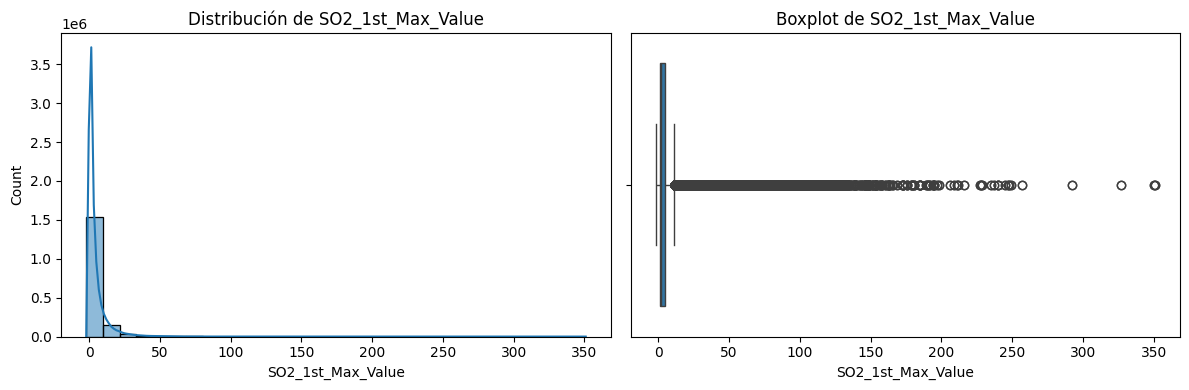

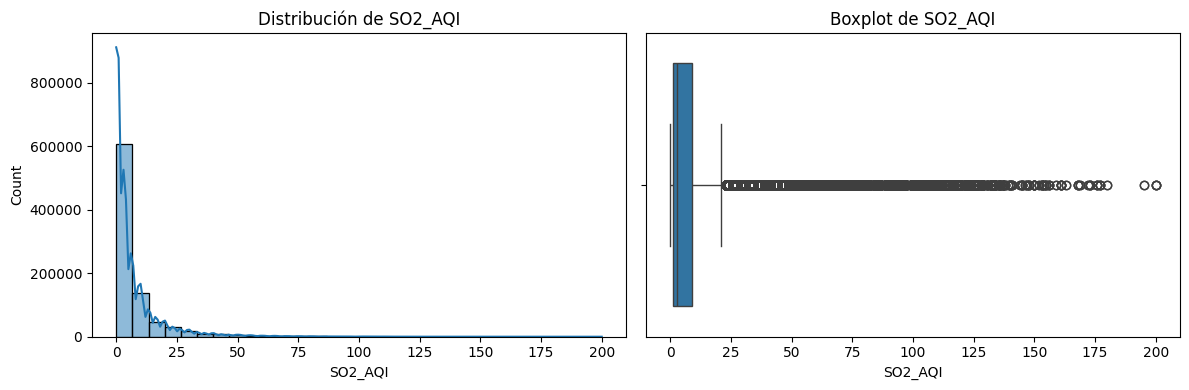

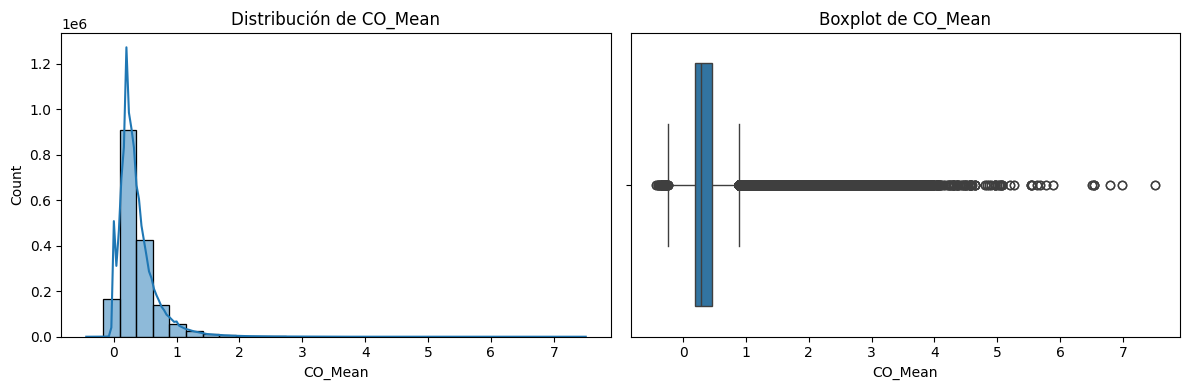

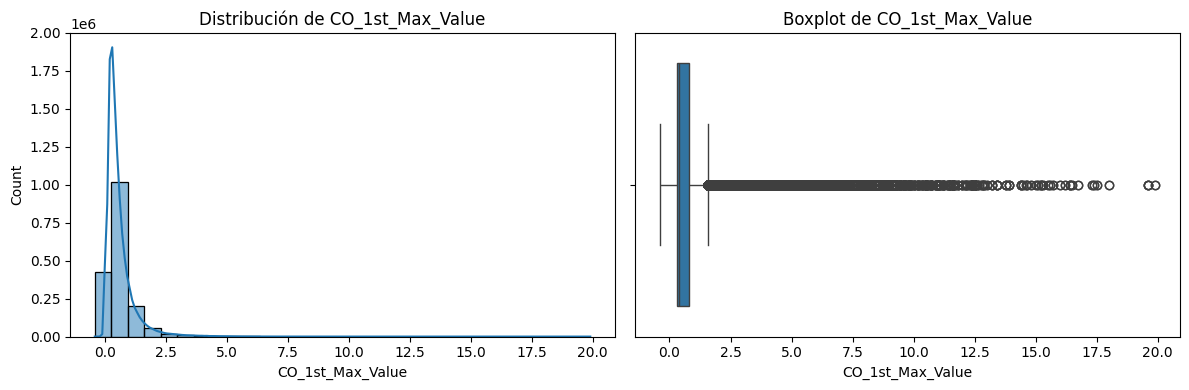

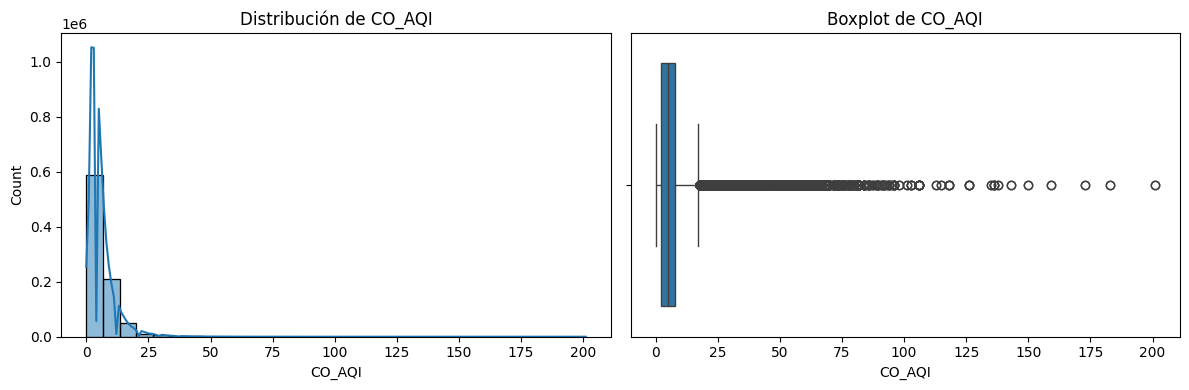

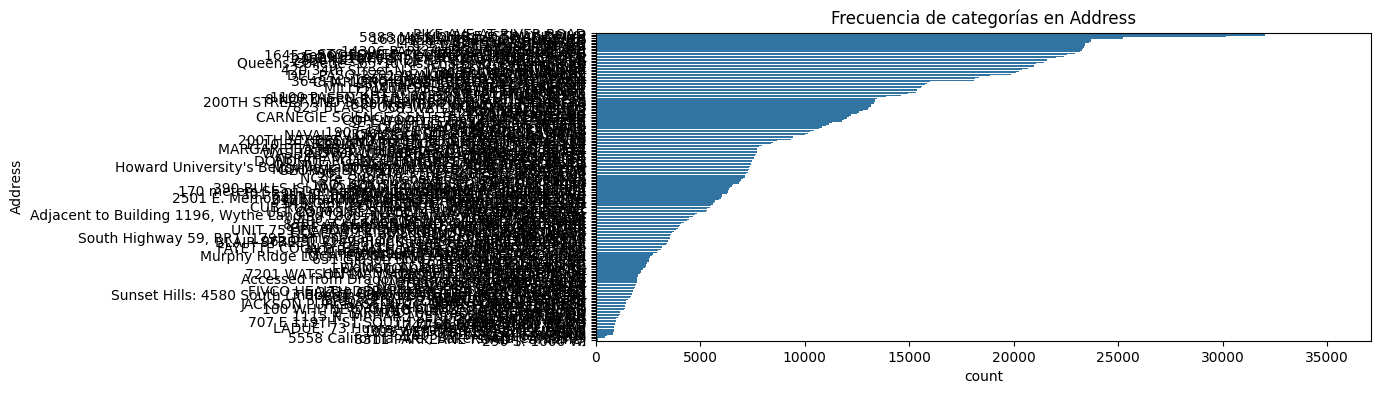

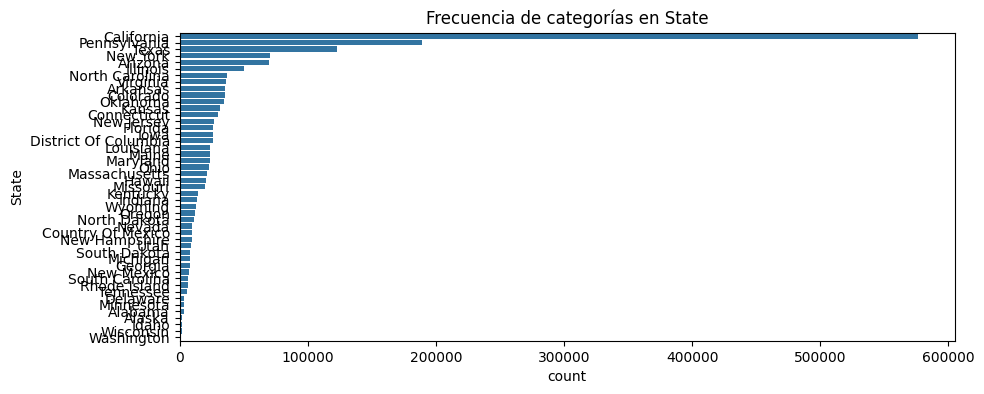

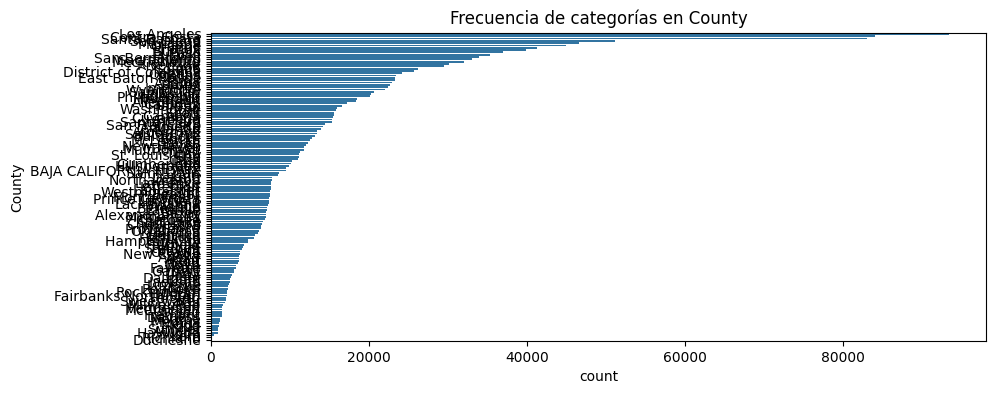

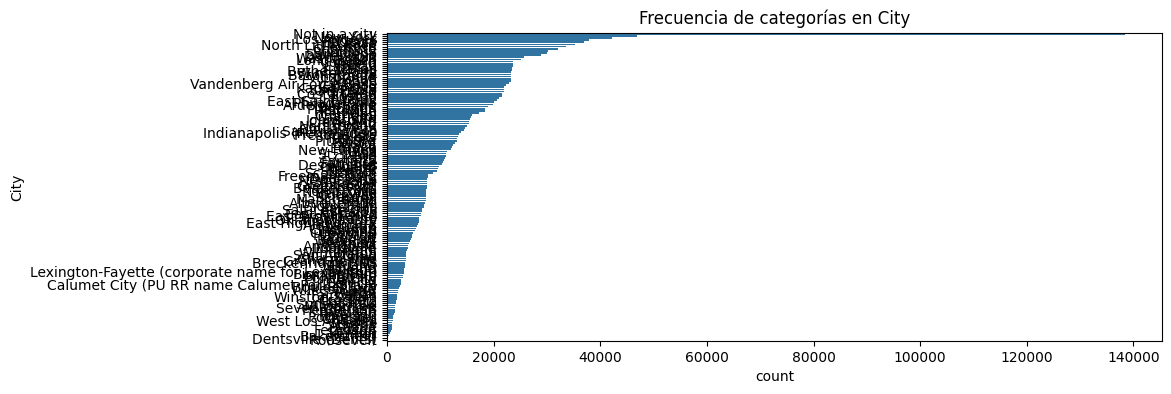

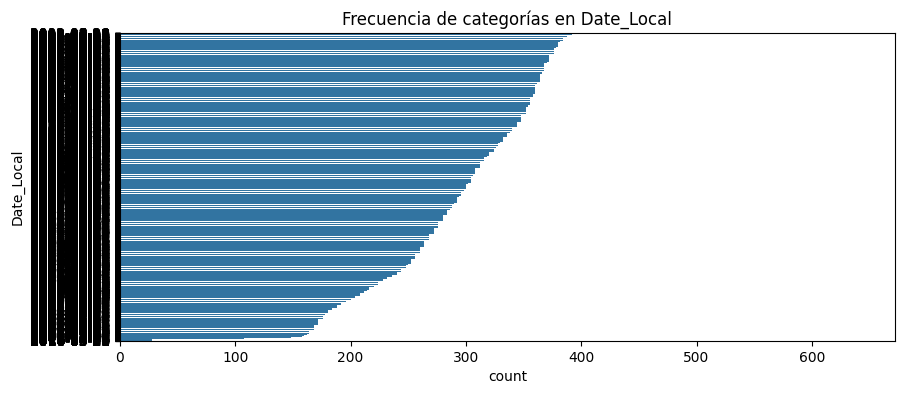

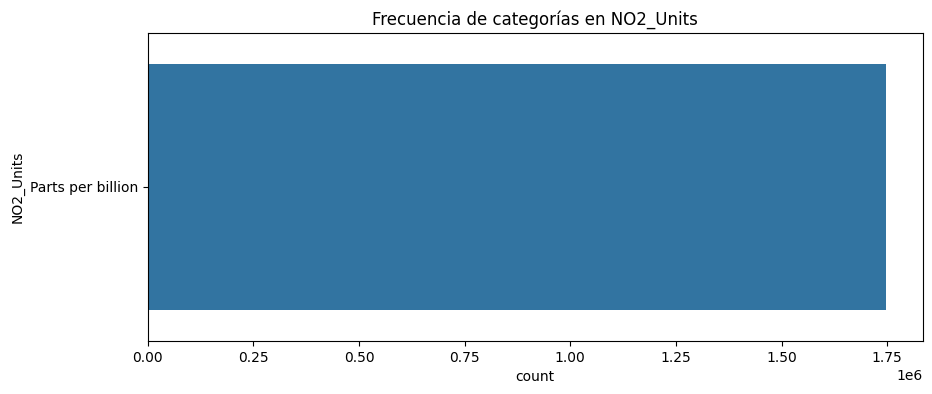

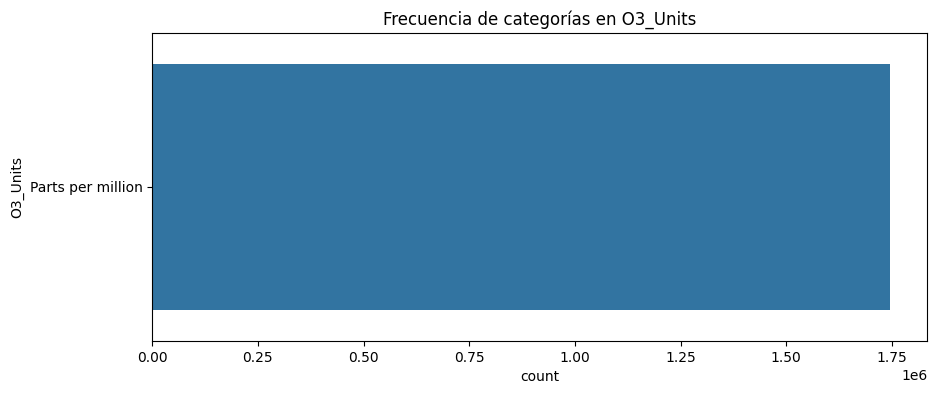

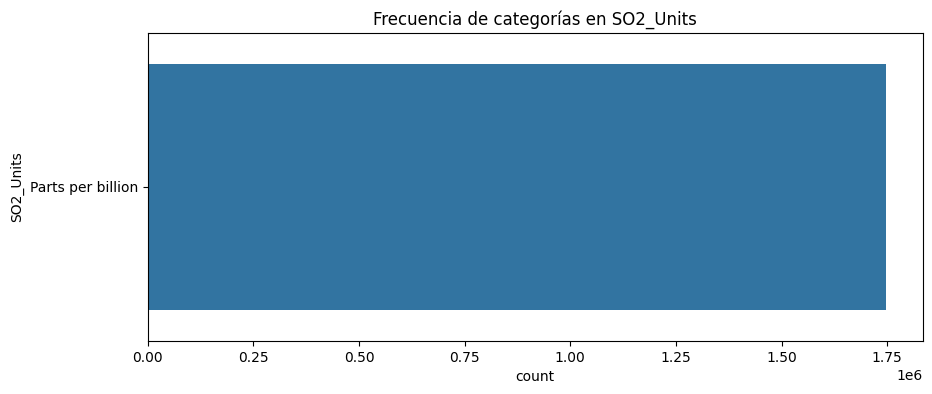

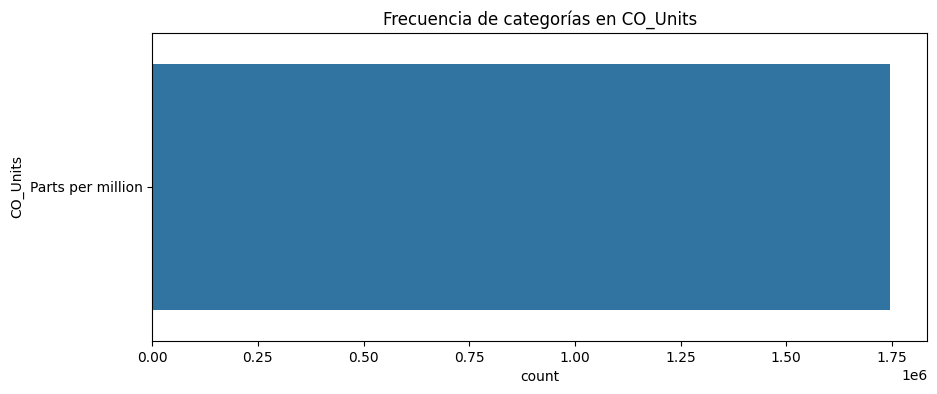

In [6]:
#Gráficos para las variables numéricas
for col in numeric_cols:
    # Creamos una figura con dos gráficos: histograma y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma para ver la distribución
    sns.histplot(df[col].dropna(), bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f"Distribución de {col}")

    # Boxplot para detectar posibles outliers
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

# Gráficos para las variables categóricas
for col in categorical_cols:
    # Creamos un gráfico de barras (countplot) para ver la frecuencia de cada categoría
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categorías en {col}")
    plt.show()

Tras mucho tiempo de analisis en informes citados en la bibliografia he llegado a la conclusion que la variable objetivo será: O3_AQI (Índice de Calidad del Aire del Ozono). En primer lugar, el AQI es una métrica estandarizada y directamente interpretable, utilizada por organismos de salud pública y medio ambiente para comunicar la calidad del aire de forma clara y comprensible. A diferencia de las concentraciones brutas (O3_Mean, O3_1st_Max_Value), el AQI ya incorpora umbrales sanitarios y criterios normativos que permiten traducir las mediciones en un impacto directo sobre la salud de la población.

Además, el ozono troposférico es uno de los contaminantes más relevantes en entornos urbanos e industriales, asociado a fenómenos de esmog y a problemas respiratorios, lo cual refuerza su valor como indicador clave de la calidad del aire. En comparación con otras opciones. Ademas ofrece un reto predictivo interesante y al mismo tiempo una mayor utilidad práctica.

#Requisitos Técnicos del Sistema ML

**Métrica de evaluación:** MAE  
**Precisión mínima aceptable:** MAE ≤ 5.0  
**Precisión deseable:** MAE ≤ 3.0  
**CPU máxima:** 4 cores  
**RAM máxima:** 18 GB  
**Tiempo máx. de entrenamiento:** 10 minutos  
**Dependencias:**
- numpy==1.24.3
- pandas==2.1.0
- scikit-learn==1.3.2
- seaborn==0.12.2


# Análisis de outliers.
A continuacion haremos un analisis de outliers para comprender esos valores extremos y determinar si son errores, son eventos raros pero validos o si pueden afectar negativamente

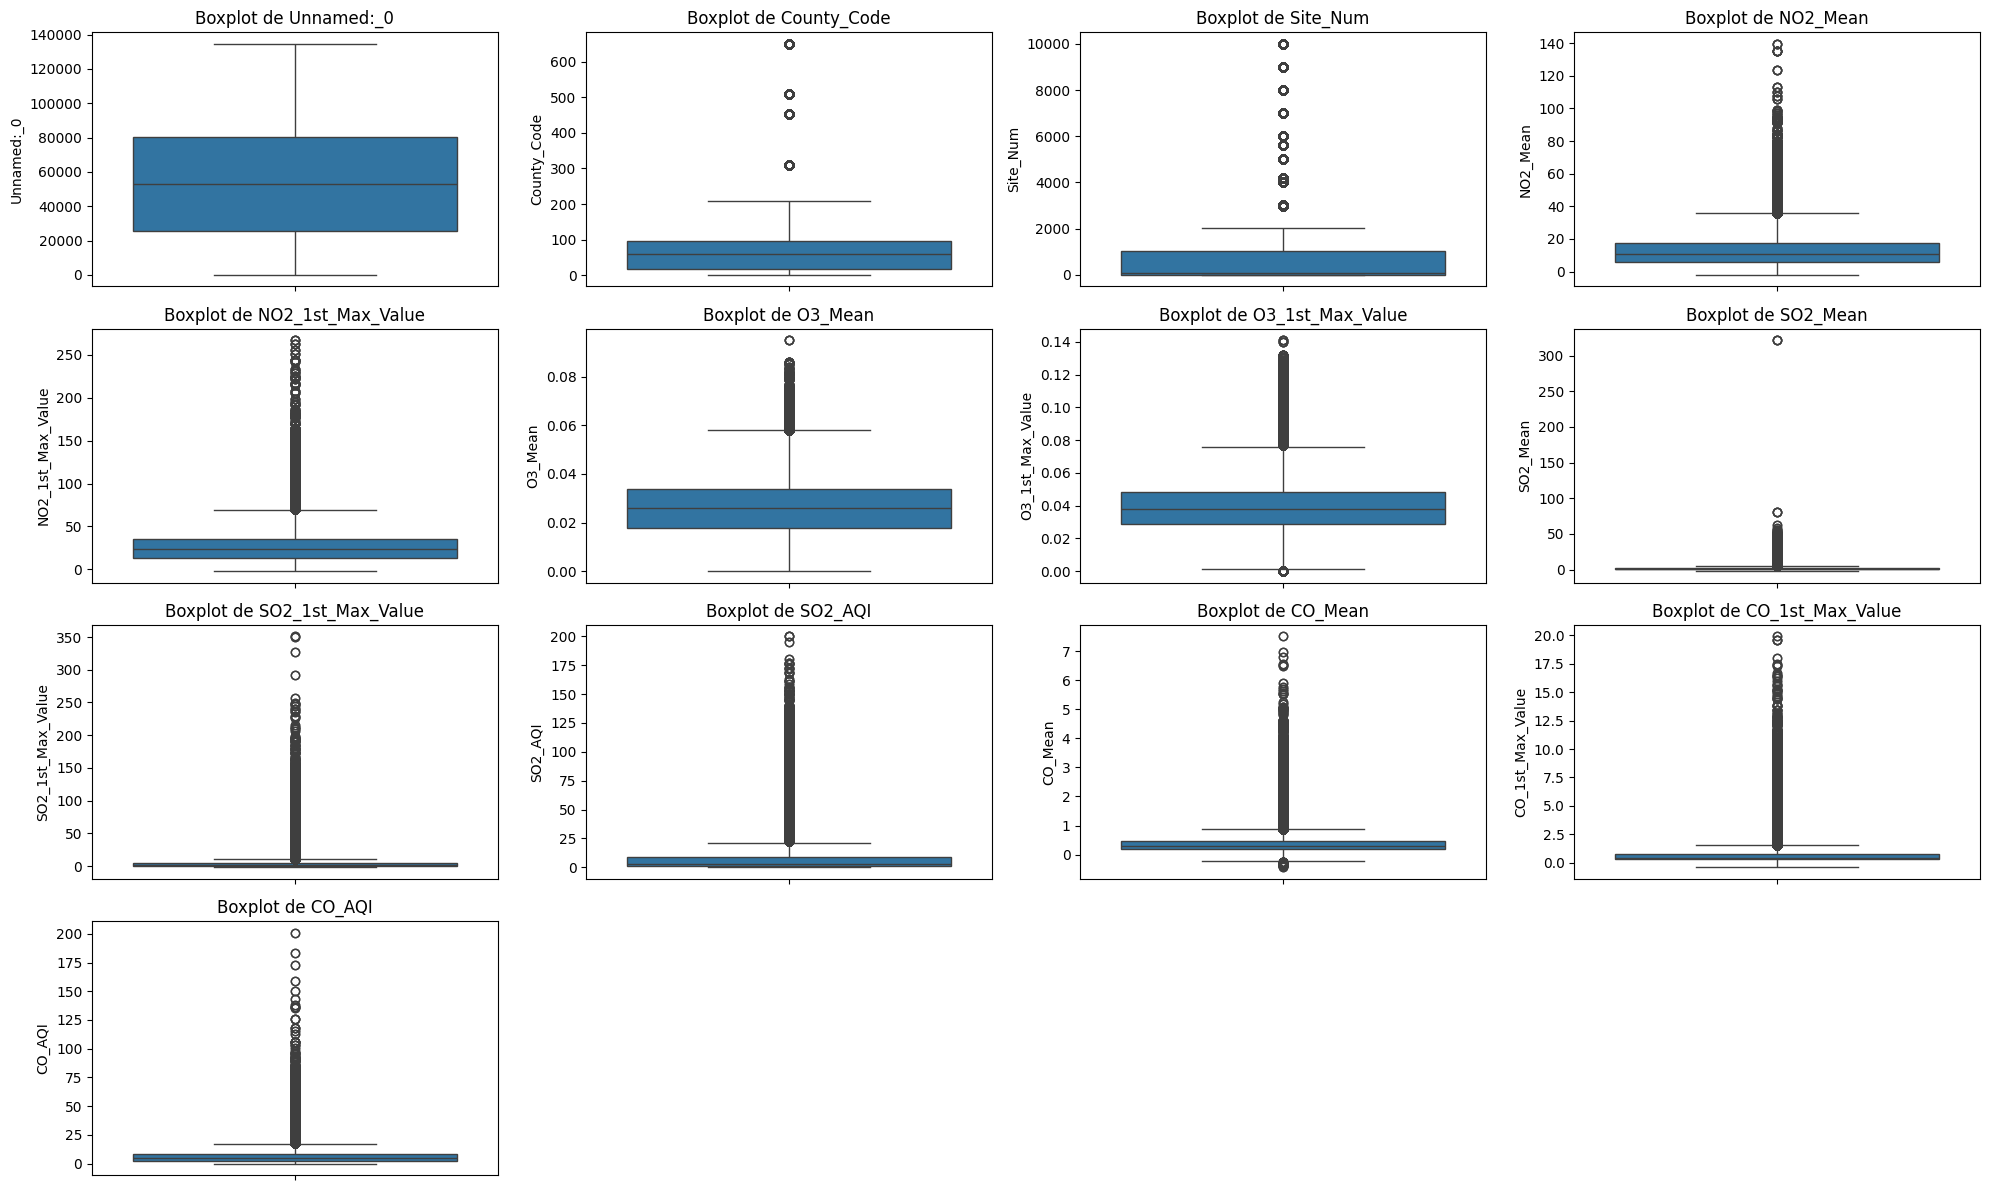

In [7]:
#Para hacer el análisis de outliers emplearemos boxplots
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Tras realizar un análisis exploratorio mediante diagramas de caja, se observa que la mayoría de las variables numéricas del dataset presentan una distribución muy concentrada en valores bajos, con una cantidad significativa de valores atípicos (outliers) hacia valores altos. Esto indica que, aunque la contaminación en general se mantiene en rangos bajos o moderados, existen episodios puntuales con niveles mucho más elevados. Este comportamiento es esperado en datos medioambientales, donde eventos de alta contaminación pueden ser esporádicos y localizados. Por ello, se trabajará se tendrá en cuenta y se continuara con la limpieza de datos y cuando este por acabar y los datos ya esten casi listos se hara limpieza de outliers para no duplicar codigo.

# Analisis de valores nulos

Vamos a identificar las columnas con valores nulos en un DataFrame que puede contener columnas en formato sparse y denso, para ello convertiremos solo las columnas sparse a formato denso temporalmente y así evitar errores al contar los nulos. Luego, seleccionaremos las columnas numéricas que tienen valores faltantes para aplicar imputación usando la media con SimpleImputer, manteniendo las columnas no numéricas sin cambios. Finalmente, actualizaremos el DataFrame original con los valores imputados y mostraremos un resumen estadístico junto con gráficos de caja para analizar la distribución de algunas columnas seleccionadas. Este proceso permite manejar eficientemente datos dispersos y completos sin perder información ni generar advertencias.

In [8]:
for col in df.columns:
    if pd.api.types.is_sparse(df[col]) and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].sparse.to_dense()

# Paso 1: Contar valores nulos sin warnings
na_counts = df.isna().sum()
cols_with_na = na_counts[na_counts > 0].index.tolist()

print("Columnas con valores nulos y su conteo:")
print(na_counts[na_counts > 0])

<ipython-input-8-a7d2155a20b5>:2: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if pd.api.types.is_sparse(df[col]) and pd.api.types.is_numeric_dtype(df[col]):


Columnas con valores nulos y su conteo:
SO2_AQI    872907
CO_AQI     873323
dtype: int64


         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

<Axes: >

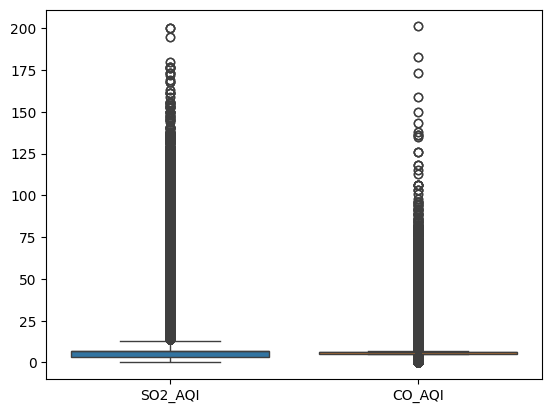

In [9]:
# Imputar valores faltantes en columnas numéricas
numeric_cols = df.select_dtypes(include=["number"]).columns
numeric_cols_with_na = [col for col in numeric_cols if col in cols_with_na]

if len(numeric_cols_with_na) > 0:
    imputer = SimpleImputer(strategy= "mean")
    df_numeric_imputed_array = imputer.fit_transform(df[numeric_cols_with_na])
    df_numeric_imputed = pd.DataFrame(df_numeric_imputed_array, columns=numeric_cols_with_na)
    df.loc[:, numeric_cols_with_na] = df_numeric_imputed
else:
    print("No hay columnas numéricas con valores nulos para imputar.")

# Mostrar resumen estadístico y boxplots
print(df.describe())

boxplot_columns = ["SO2_AQI", "CO_AQI"]
sns.boxplot(data=df[boxplot_columns])

La columna "None" no se elimina con el código de imputación porque dicha operación solo afecta a columnas numéricas, mientras que "None" es una columna no numérica que permanece intacta y con valores nulos. Por lo tanto, los valores faltantes en esa columna siguen presentes después del proceso. Por lo que la eliminaremos directamente

In [10]:
df.columns

Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'Address',
       'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Units',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Units',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Units', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'],
      dtype='object')

In [11]:
if "None" in df.columns:
    df.drop(columns=["None"], inplace=True)
    print('Columna "None" eliminada.')
else:
    print('La columna "None" no existe en el DataFrame.')

# Ahora comprobar si siguen habiendo valores nulos
print(df.isna().any().any())
print(df.isna().sum()[df.isna().sum() > 0])


La columna "None" no existe en el DataFrame.
False
Series([], dtype: int64)


# Analisis de columnas categoricas

Se realizará un análisis de las columnas categóricas presentes en el DataFrame para entender su estructura y contenido. Primero se identificarán las columnas de tipo objeto que suelen representar variables categóricas. Luego se inspeccionarán los tipos de datos que contienen para asegurar consistencia y detectar posibles valores atípicos o inconsistentes. También se analizará el número de categorías únicas en cada columna y se mostrarán ejemplos representativos de sus valores. Este análisis es fundamental para decidir cómo limpiar, transformar o codificar estas variables para su posterior uso en modelos de machine learning.

In [12]:
categorical_cols_clean = df.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols_clean))
print()

# De esta manera nos aseguramos que las columnas categoricas con str
for col in categorical_cols:
    tipos = df[col].map(type).unique()
    print(f"{col}: tipos de datos encontrados -> {tipos}")

# De esta manera nos haremos una idea de lo que hay en cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"- Número de categorías únicas: {df[col].nunique()}")
    print(f"- Ejemplos de valores: {df[col].unique()[:10]}")

Características categóricas analizadas: ['Address', 'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Address: tipos de datos encontrados -> [<class 'str'>]
State: tipos de datos encontrados -> [<class 'str'>]
County: tipos de datos encontrados -> [<class 'str'>]
City: tipos de datos encontrados -> [<class 'str'>]
Date_Local: tipos de datos encontrados -> [<class 'str'>]
NO2_Units: tipos de datos encontrados -> [<class 'str'>]
O3_Units: tipos de datos encontrados -> [<class 'str'>]
SO2_Units: tipos de datos encontrados -> [<class 'str'>]
CO_Units: tipos de datos encontrados -> [<class 'str'>]

Address:
- Número de categorías únicas: 204
- Ejemplos de valores: ['1645 E ROOSEVELT ST-CENTRAL PHOENIX STN'
 '2857 N MILLER RD-S SCOTTSDALE STN' '1237 S. BEVERLY , TUCSON'
 '2956-A TREAT BOULEVARD' '5551 BETHEL ISLAND RD'
 'UNIT 759 EL PORTAL SHOPPING CENTER, San Pablo'
 '583 W. 10TH ST., PITTSBURG' '1029 ETHEL ST, CALEXICO HIGH SCHOOL'
 '5558 Californi

Se eliminarán primero las columnas que indican las unidades de medida, ya que no aportan información directa para el modelo y pueden confundir si se dejan. Estas columnas usualmente terminan con _Units.

In [13]:
# Columnas que están originalmente en ppm → convertir a ppb
ppm_cols = [
    'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
    'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'
]

# Convertir a tipo más amplio para evitar overflow
df[ppm_cols] = df[ppm_cols].astype('float64')

# Aplicar conversión
df[ppm_cols] = df[ppm_cols] * 1000

print("Conversión a ppb completada sin errores.")

Conversión a ppb completada sin errores.


In [14]:
# Eliminar columnas que indican unidades (terminan con '_Units')
unit_cols = [col for col in df.columns if col.endswith("_Units")]
for col in unit_cols:
    print(f"Eliminando columna: {col}")
df.drop(columns=unit_cols, inplace=True)

Eliminando columna: NO2_Units
Eliminando columna: O3_Units
Eliminando columna: SO2_Units
Eliminando columna: CO_Units


A continuación, se procesará el DataFrame df para extraer información temporal de la columna 'Date_Local', creando nuevas columnas con el año, mes y día de la semana, siempre que esta columna exista. Después, se eliminarán las columnas 'Date_Local' y 'Address' si están presentes, para limpiar el dataset.
Se elimina la columna "Address" porque es muy específica y detallada, mientras que ya contamos con otras columnas geográficas como "State", "County" y "City" que resumen suficientemente la ubicación para el análisis.

In [15]:
# Solo crear las columnas si "Date_Local" existe
if "Date_Local" in df.columns:
    df["year"] = pd.to_datetime(df["Date_Local"]).dt.year
    df["month"] = pd.to_datetime(df["Date_Local"]).dt.month
    df["weekday"] = pd.to_datetime(df["Date_Local"]).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar "Date_Local" y "Address" solo si existen
cols_to_drop = []
if "Date_Local" in df.columns:
    cols_to_drop.append("Date_Local")
else:
    print("Date_Local ya estaba borrado.")

if "Address" in df.columns:
    cols_to_drop.append("Address")
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df:")
print(df.columns)


Columnas finales en df:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'State',
       'County', 'City', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour',
       'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year',
       'month', 'weekday'],
      dtype='object')


# Correlacion de caracteristicas

Primero, se reordenan los datos aleatoriamente para evitar sesgos por el orden original en que estaban organizados. Luego, se realiza un resumen estadístico para entender las características principales de cada variable y visualizar sus distribuciones, lo cual ayuda a detectar posibles problemas como valores atípicos. A continuación, se calcula una matriz de correlación que permite identificar qué variables están más relacionadas entre sí y, especialmente, con la variable objetivo, facilitando así la selección de características relevantes. Finalmente, el conjunto de datos se divide en subsets de entrenamiento, validación y prueba, o alternativamente se utiliza un esquema de validación cruzada (como K-fold) para asegurar que los modelos sean evaluados de forma robusta y generalizable.

         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e+01   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

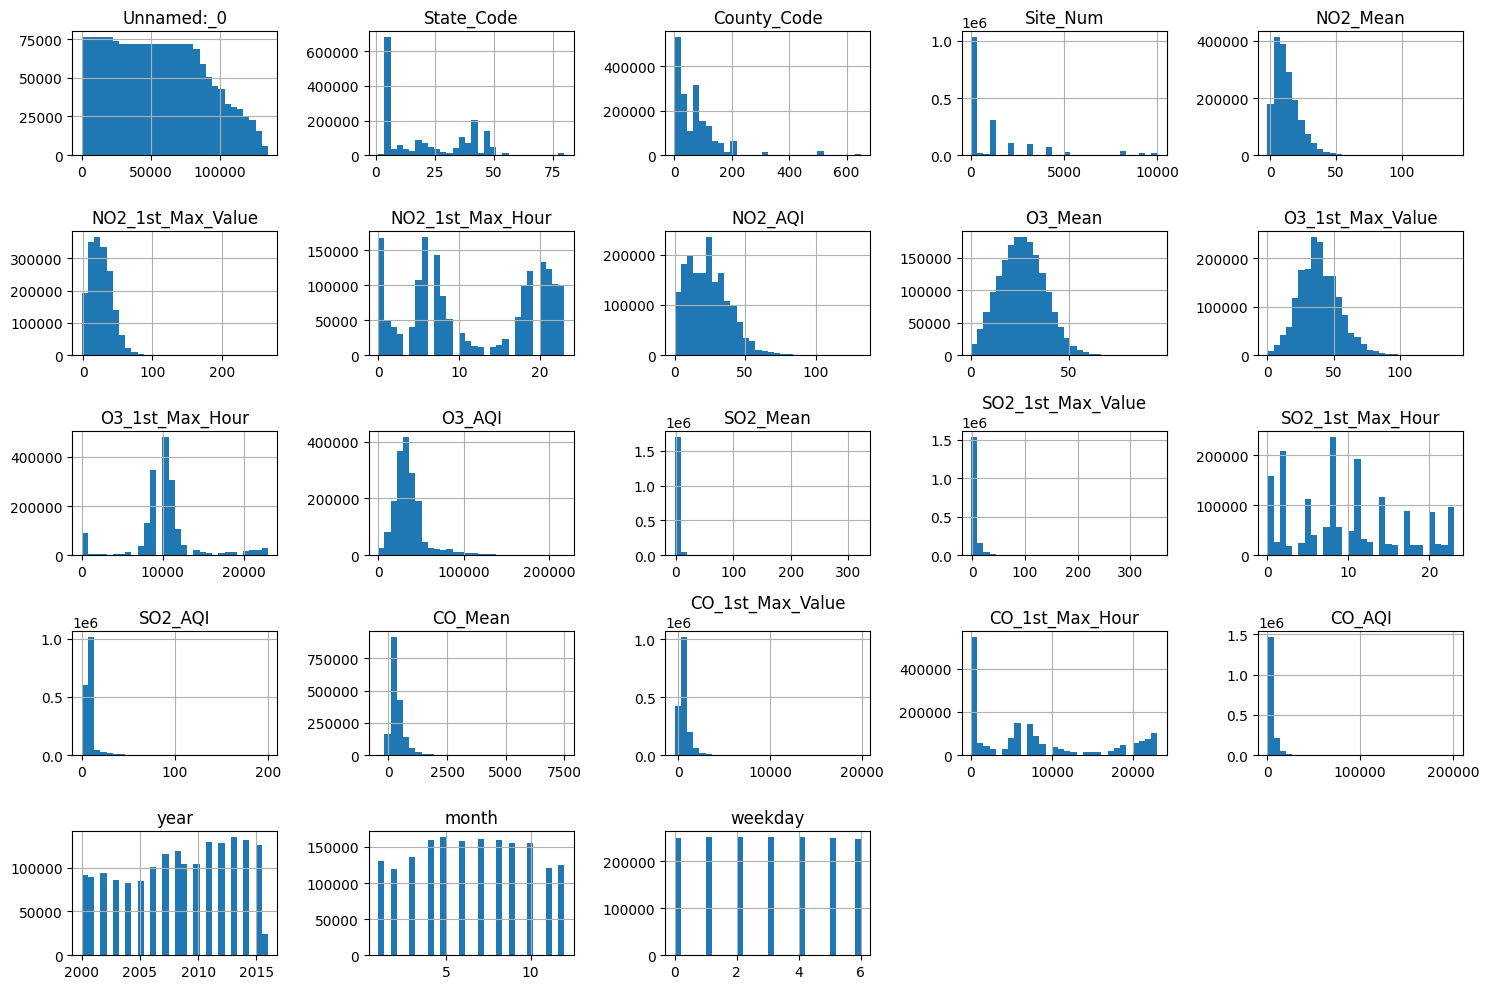

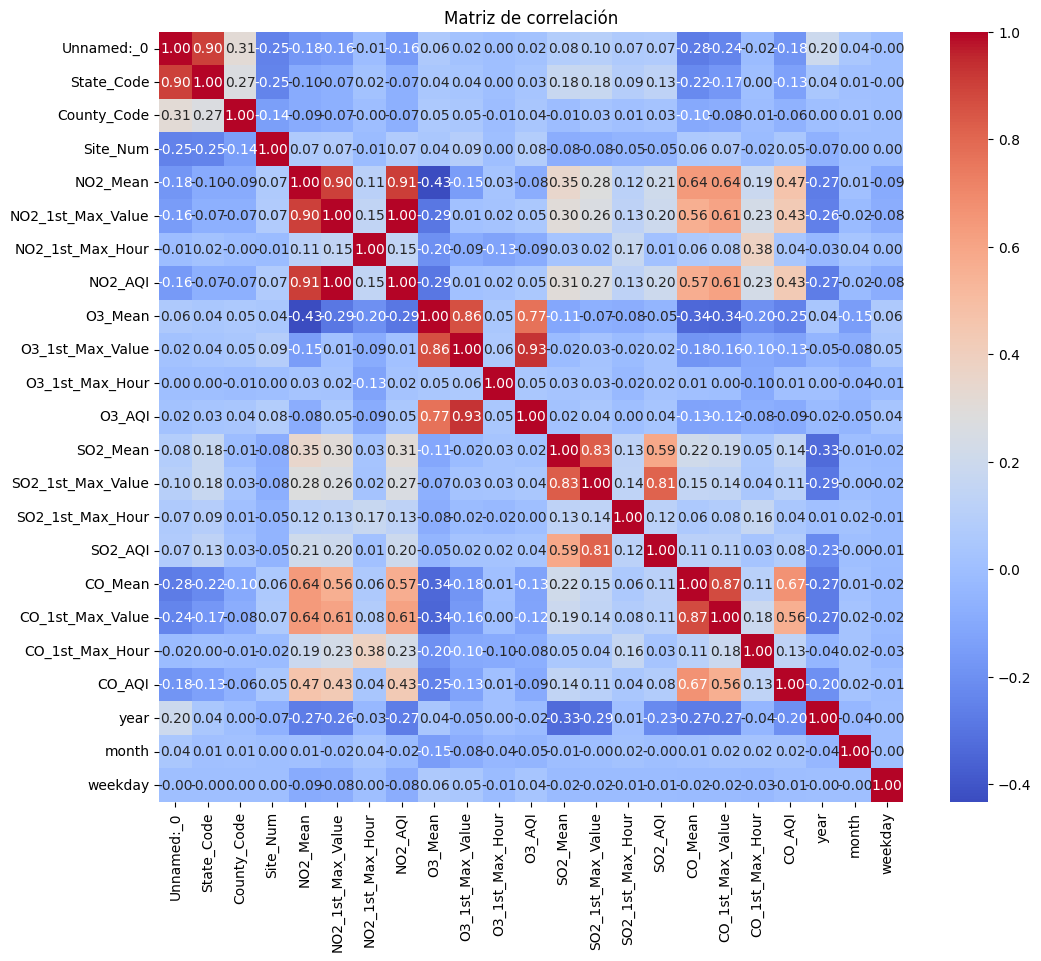

In [16]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.describe())

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

corr_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Se eliminará la columna "Unnamed:_0" porque su nombre sugiere que es un índice automático generado al exportar o importar los datos (por ejemplo, al leer un archivo CSV), y no aporta información relevante para el análisis ni para el modelado. Mantenerla solo añadiría ruido al dataset. De todas forma ahora se comprobrá si de verdad es un indice:

In [17]:
if "Unnamed:_0" in df.columns:
    print("Valores únicos en 'Unnamed:_0':")
    print(df["Unnamed:_0"].unique())

    df.drop(columns=["Unnamed:_0"], inplace=True)
    print("\nColumna 'Unnamed:_0' eliminada.")
else:
    print("La columna 'Unnamed:_0' no existe en el DataFrame.")

print("\nColumnas finales en el DataFrame:")
print(df.columns)

Valores únicos en 'Unnamed:_0':
[ 44403  15612  12092 ... 132237 133971 133932]

Columna 'Unnamed:_0' eliminada.

Columnas finales en el DataFrame:
Index(['State_Code', 'County_Code', 'Site_Num', 'State', 'County', 'City',
       'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean',
       'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month',
       'weekday'],
      dtype='object')


In [18]:
target_corr = corr_matrix["O3_AQI"].sort_values(ascending=False)
print(target_corr)

O3_AQI               1.000000
O3_1st_Max_Value     0.931867
O3_Mean              0.768771
Site_Num             0.083351
NO2_AQI              0.049027
NO2_1st_Max_Value    0.048743
O3_1st_Max_Hour      0.048395
SO2_1st_Max_Value    0.044307
County_Code          0.040689
SO2_AQI              0.036757
weekday              0.036273
State_Code           0.033527
Unnamed:_0           0.017080
SO2_Mean             0.015523
SO2_1st_Max_Hour     0.000883
year                -0.019809
month               -0.047594
CO_1st_Max_Hour     -0.078250
NO2_Mean            -0.082361
NO2_1st_Max_Hour    -0.086782
CO_AQI              -0.091990
CO_1st_Max_Value    -0.120001
CO_Mean             -0.129736
Name: O3_AQI, dtype: float64


La correlación de Pearson muestra una relación muy alta entre O3_AQI y las variables O3_1st_Max_Value y O3_Mean porque O3_AQI se calcula directamente a partir de estos valores. Esto significa que estas columnas contienen información casi idéntica a la variable objetivo, por lo que un modelo entrenado con ellas tenderá a aprender simplemente a replicar ese cálculo, limitando su capacidad para generalizar y detectar patrones adicionales en otras variables.

In [19]:
df.drop(columns=["O3_1st_Max_Value", "O3_Mean"], inplace=True)
print("Columnas 'O3_1st_Max_Value' y 'O3_Mean' eliminadas.")
print("Columnas actuales en el DataFrame:")
print(df.columns)

Columnas 'O3_1st_Max_Value' y 'O3_Mean' eliminadas.
Columnas actuales en el DataFrame:
Index(['State_Code', 'County_Code', 'Site_Num', 'State', 'County', 'City',
       'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI',
       'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value',
       'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value',
       'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month', 'weekday'],
      dtype='object')


# Prepocesamiento de datos numericos y categoricos

Dado que la columna State tiene un número manejable de categorías (47), aplicar One-Hot Encoding es una buena opción para convertir cada estado en una columna binaria sin perder información. Esto permite que el modelo interprete cada estado como una característica independiente.

Por otro lado, County y City tienen muchas más categorías (133 y 144 respectivamente), lo que haría que One-Hot Encoding genere demasiadas columnas, aumentando la dimensionalidad y el riesgo de sobreajuste. Para estas variables, usamos Frequency Encoding, que reemplaza cada categoría por la frecuencia con la que aparece en el dataset. Esto reduce la dimensionalidad y permite al modelo captar la importancia relativa de cada categoría sin explotar la cantidad de columnas.

In [20]:
# One-Hot Encoding para 'State'
df = pd.get_dummies(df, columns=["State"], drop_first=True)

# Convertir columnas booleanas de 'State_' a 0/1
state_cols = [col for col in df.columns if col.startswith("State_")]
df[state_cols] = df[state_cols].astype(int)

# Frequency Encoding para 'County' y 'City'
for col in ["County", "City"]:
    freq_encoding = df[col].value_counts(normalize=True)
    df[col + "_freq_enc"] = df[col].map(freq_encoding)

# Eliminamos las columnas originales 'County' y 'City' tras la codificación
df.drop(columns=["County", "City"], inplace=True)

# Verificamos las nuevas columnas
print(df.filter(regex="State_|_freq_enc").head())

   State_Code  State_Alaska  State_Arizona  State_Arkansas  State_California  \
0           8             0              0               0                 0   
1           6             0              0               0                 1   
2           6             0              0               0                 1   
3          42             0              0               0                 0   
4           6             0              0               0                 1   

   State_Colorado  State_Connecticut  State_Country Of Mexico  State_Delaware  \
0               1                  0                        0               0   
1               0                  0                        0               0   
2               0                  0                        0               0   
3               0                  0                        0               0   
4               0                  0                        0               0   

   State_District Of Columbia  .

In [21]:
# Comprobacion de que las columnas ya estan con los cambios aplicados
df.head()

,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_1st_Max_Hour,O3_AQI,SO2_Mean,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Virginia,State_Washington,State_Wisconsin,State_Wyoming,County_freq_enc,City_freq_enc
0,8,1,3001,22.652174,43.0,7,41,10000.0,61000.0,2.000000,...,0,0,0,0,0,0,0,0,0.013124,0.012009
1,6,23,1004,1.237500,2.8,9,2,16000.0,36000.0,-0.079167,...,0,0,0,0,0,0,0,0,0.010618,0.006985
2,6,19,8,8.956522,18.0,5,17,9000.0,119000.0,3.457143,...,0,0,0,0,0,0,0,0,0.008761,0.008761
3,42,17,12,16.625000,34.0,18,32,0.0,36000.0,2.541667,...,0,0,0,0,0,0,0,0,0.007327,0.007327
4,6,23,1004,1.661111,2.7,13,2,10000.0,33000.0,-0.460000,...,0,0,0,0,0,0,0,0,0.010618,0.006985


In [22]:
# Revisión general
print("¿El DataFrame tiene algún nulo?")
print(df.isnull().values.any())

print("¿El DataFrame tiene algún NaN?")
print(df.isna().values.any())

¿El DataFrame tiene algún nulo?
False
¿El DataFrame tiene algún NaN?
False


# Modelo base
Ahora se aplica bucketización porque vamos a entrenar un modelo de regresión lineal.
La regresión lineal solo puede capturar relaciones lineales entre las variables y el objetivo.
Si las variables tienen efectos no lineales o por rangos, el modelo no los detectará bien.
Al bucketizar, transformamos las variables continuas en categorías discretas según rangos específicos.
Esto permite que la regresión lineal capture cambios de efecto por tramos, simulando una relación no lineal simple.
Además, reduce el impacto de valores extremos que podrían sesgar la línea de regresión.
Así, mejoramos la capacidad del modelo lineal para ajustarse a datos con patrones más complejos sin usar polinomios o modelos más complicados.

In [ ]:
# Copia del dataset original
df_binned = df.copy()

# Bucketización ajustando dinámicamente los bins
for col in ["NO2_1st_Max_Value", "SO2_1st_Max_Value", "CO_1st_Max_Value"]:
    max_val = df_binned[col].max()
    bins = [0, 10, 20, 30, 40, 50, 100]
    if max_val > 100:
        bins.append(max_val + 1)  # agregar bin superior si es necesario

    df_binned[f"{col}_bin"] = pd.cut(df_binned[col], bins=bins, labels=False, include_lowest=True)

# Verificar si quedaron NaNs después del corte (opcional, de diagnóstico)
for col in ["NO2_1st_Max_Value", "SO2_1st_Max_Value", "CO_1st_Max_Value"]:
    num_na = df_binned[f"{col}_bin"].isnull().sum()
    print(f"{col}_bin tiene {num_na} NaNs")

# Opcional: llenar cualquier NaN restante con un valor especial (ej. -1)
df_binned.fillna(-1, inplace=True)

# Preparar X e y
X = df_binned.drop(columns=["O3_AQI"])
y = df_binned["O3_AQI"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NO2_1st_Max_Value_bin tiene 184 NaNs
SO2_1st_Max_Value_bin tiene 8286 NaNs
CO_1st_Max_Value_bin tiene 198 NaNs


**Regresión lineal:**

Se usa cuando asumimos que la relación entre las variables independientes y la dependiente es lineal, simple de interpretar y rápida de entrenar.
Permite entender fácilmente el efecto de cada variable sobre el objetivo a través de sus coeficientes.

In [ ]:
# Entrenar modelo lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")


MSE (Error cuadrático medio): 330661140.60
R2 (Coeficiente de determinación): 0.1632


En los resultados, un R² bajo (~0.16) indica que el modelo solo explica una pequeña parte de la variabilidad del O3_AQI.
Esto puede deberse a relaciones no lineales que la regresión lineal no capta, o a la presencia de ruido y variables irrelevantes.
Es útil como línea base porque permite comparar modelos más avanzados frente a un enfoque sencillo.
Sin embargo, su capacidad predictiva suele ser limitada en datasets con relaciones complejas.
La interpretación directa de los coeficientes puede ser engañosa si las variables están correlacionadas (multicolinealidad).

**HistGradientBoostingRegressor:**

Después de entrenar la regresión lineal, que obtuvo un R² bajo (0.16), se opta por usar HistGradientBoostingRegressor para mejorar el desempeño.

Esto se debe a que la regresión lineal solo captura relaciones lineales y no modela interacciones ni efectos no lineales entre variables.

El HistGradientBoostingRegressor, al ser un modelo basado en árboles y boosting, puede detectar patrones complejos y no lineales que la regresión lineal no puede capturar.

Por eso, es adecuado para aumentar la precisión y explicar mejor la variabilidad del target cuando la regresión lineal se queda corta.

In [ ]:
X = df.drop(columns=["O3_AQI"])
y = df["O3_AQI"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = HistGradientBoostingRegressor(max_iter=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

MSE (Error cuadrático medio): 176618191.40
R2 (Coeficiente de determinación): 0.5530


En los resultados, un R² mucho mejor (~0.55) muestra que el modelo logra explicar más de la mitad de la variabilidad del O3_AQI.
Esto indica que la relación entre variables y objetivo no es lineal, y los métodos de boosting son más adecuados.
El modelo también es robusto frente a outliers y no requiere escalar los datos.
Puede ser más costoso computacionalmente, pero ofrece predicciones más precisas y flexibles.

In [ ]:
# Entrenar HistGradientBoostingRegressor con hiperparámetros optimizados
model = HistGradientBoostingRegressor(
    max_iter=300,            # más iteraciones para mejor convergencia
    learning_rate=0.05,      # tasa de aprendizaje más baja, más fino
    max_depth=7,             # profundidad controlada para no sobreajustar
    l2_regularization=0.1,   # regularización para estabilidad
    random_state=42
)

model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

MSE (Error cuadrático medio): 173645269.9957
R2 (Coeficiente de determinación): 0.5605


**LightGBM:**

Se espera que LightGBM capture relaciones complejas y no lineales en el dataset de forma eficiente y rápida, especialmente en grandes volúmenes de datos. Su arquitectura basada en histogramas y técnicas de boosting lo hacen adecuado para mejorar la precisión del modelo, superando limitaciones de modelos lineales simples. Usaremos LightGBM para intentar mejorar la capacidad predictiva manteniendo un tiempo razonable de entrenamiento.

In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.8 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb

# Crear el modelo LightGBM
model = lgb.LGBMRegressor(
    n_estimators=100,       # similar a max_iter en HistGradient
    max_depth=10,           # profundidad de los árboles
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 1397328, number of used features: 67
[LightGBM] [Info] Start training from score 36041.728928
MSE (Error cuadrático medio): 177185718.4468
R2 (Coeficiente de determinación): 0.5516


**XGBoost:**

es un modelo potente de boosting basado en árboles que maneja bien interacciones y efectos no lineales entre variables. Se destaca por su robustez y flexibilidad, además de ofrecer opciones avanzadas para evitar sobreajuste. Usaremos XGBoost para aprovechar su efectividad en datasets tabulares, buscando mejorar la precisión del modelo y superar las limitaciones de la regresión lineal y otros métodos anteriores

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBRegressor(
    n_estimators=100,      # número de árboles, similar a max_iter
    max_depth=10,          # profundidad máxima
    learning_rate=0.1,     # tasa de aprendizaje
    random_state=42,
    verbosity=1            # reduce si no quieres mucha salida en consola
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")


MSE (Error cuadrático medio): 127508511.1803
R2 (Coeficiente de determinación): 0.6773


Después de obtener un rendimiento razonable con XGBoost (R² ≈ 0.6773), es importante optimizar sus hiperparámetros para mejorar la precisión del modelo.

El código usa RandomizedSearchCV, que permite explorar de manera eficiente un amplio espacio de combinaciones de hiperparámetros sin probar todas las posibilidades, lo que ahorra tiempo frente a un GridSearch exhaustivo.

Se definen parámetros clave como la profundidad del árbol, la tasa de aprendizaje, la cantidad de estimadores, y factores de regularización para controlar el sobreajuste y mejorar la generalización.

Mediante validación cruzada, se evalúan distintas configuraciones para encontrar la que maximiza el coeficiente R², buscando un balance entre sesgo y varianza.

Finalmente, el mejor modelo encontrado se evalúa en el conjunto de test para medir la mejora real en desempeño, lo que garantiza que la optimización se traduzca en mejor capacidad predictiva.

Este proceso es esencial para sacar el máximo provecho de XGBoost y ajustar el modelo a las características específicas de los datos.

In [ ]:
# Define el modelo base
model = xgb.XGBRegressor(random_state=42)

# Define el espacio de búsqueda para los hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],         # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]          # L2 regularization
}

# Configura RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,               # número de combinaciones a probar
    scoring='r2',            # métrica para optimizar
    cv=3,                    # validación cruzada 3-fold
    verbose=2,
    random_state=42,
    n_jobs=-1                # usa todos los cores disponibles
)

# Ejecuta la búsqueda
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Predicciones y evaluación
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'subsample': 1.0, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
MSE: 94708878.1401
R2: 0.7603


Al hacer la búsqueda de hiperparámetros, selogró adaptar el modelo al conjunto de datos de manera mucho más fina que con los valores por defecto. Esto reduce sesgo (captura patrones mejores) y controla la varianza (evita sobreajuste), maximizando la capacidad predictiva. Despues de esta busqueda que costó 1 hora y media de entrenamiento entrenaremos de nuevo el modelo con los hiperparametros obtenidos



In [ ]:
# Crear el modelo XGBoost con los hiperparámetros proporcionados
model = xgb.XGBRegressor(
    n_estimators=200,        # del search
    max_depth=10,            # del search
    learning_rate=0.2,       # del search
    subsample=1.0,           # del search
    colsample_bytree=1.0,    # del search (ajustado aquí)
    reg_alpha=10,            # L1 regularization (ajustado aquí)
    reg_lambda=3,            # L2 regularization (ajustado aquí)
    random_state=42,
    verbosity=1              # reduce si no quieres mucha salida en consola
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")


MSE (Error cuadrático medio): 94708878.1401
R2 (Coeficiente de determinación): 0.7603


In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, explained_variance_score, max_error
)
import numpy as np

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# Mostrar resultados
print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.4f}")
print(f"MAE (Error absoluto medio): {mae:.4f}")
print(f"MAPE (Error porcentual absoluto medio): {mape * 100:.2f}%")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Explained Variance (Varianza explicada): {explained_var:.4f}")
print(f"Max Error (Error máximo): {max_err:.4f}")

MSE (Error cuadrático medio): 94708878.1401
RMSE (Raíz del error cuadrático medio): 9731.8486
MAE (Error absoluto medio): 6152.0024
MAPE (Error porcentual absoluto medio): 801303007377807104.00%
R² (Coeficiente de determinación): 0.7603
Explained Variance (Varianza explicada): 0.7603
Max Error (Error máximo): 141863.8281


In [ ]:
# Si y_test es un array de numpy
print("Estadísticas básicas de y_test:")
print(f"Min: {np.min(y_test)}")
print(f"Max: {np.max(y_test)}")
print(f"Media: {np.mean(y_test)}")
print(f"Mediana: {np.median(y_test)}")
print(f"Desviación estándar: {np.std(y_test)}")

# Si y_test es un pandas Series
# y_test.describe() te da un resumen muy completo
print("\nResumen estadístico usando pandas:")
print(pd.Series(y_test).describe())

Estadísticas básicas de y_test:
Min: 0.0
Max: 211000.0
Media: 36083.688056954255
Mediana: 33000.0
Desviación estándar: 19877.804143871646

Resumen estadístico usando pandas:
count    349333.000000
mean      36083.688057
std       19877.832595
min           0.000000
25%       25000.000000
50%       33000.000000
75%       42000.000000
max      211000.000000
Name: O3_AQI, dtype: float64


Verificando ahora la escala de y_test podemos interpretar mejor las metricas de evaluacion del modelo para cerciorarnos si es un modelo solido o no:

**MSE** (Error cuadrático medio): 0.0022
Mide el promedio de los cuadrados de los errores entre predicción y valor real, penalizando mucho los errores grandes.
Con y_test que varía entre 0 y ~0.97 (media ~0.165), este valor es bastante bajo, indicando que en promedio los errores son pequeños respecto a la escala de los datos.

**RMSE** (Raíz del error cuadrático medio): 0.0474
Es la raíz cuadrada del MSE, por lo que está en la misma unidad que la variable objetivo.
Aquí significa que el error promedio es de ~0.047 unidades, lo cual es bajo considerando que la desviación estándar de y_test es ~0.091.
Es más intuitivo que el MSE porque puedes compararlo directamente con los valores reales.

**MAE** (Error absoluto medio): 0.0300
Promedio de las diferencias absolutas entre predicciones y valores reales.
Un MAE de 0.03 es pequeño frente a una media de ~0.165, mostrando que, en promedio, las predicciones se desvían poco.

**MAPE** (Error porcentual absoluto medio): 4,423,542,492,179.09%
El MAPE mide el error porcentual promedio, pero explota cuando hay valores reales cercanos a cero (como los que tienes, con mínimo = 0).
Por eso, aquí no es una métrica fiable y puedes descartarla para la evaluación.

**R²** (Coeficiente de determinación): 0.7296
Indica qué porcentaje de la variabilidad de los datos explica el modelo.
Un R² de ~0.73 significa que el modelo captura el 73% de la varianza total, lo cual es sólido para muchos problemas reales.

**Explained Variance** (Varianza explicada): 0.7296
Muy similar a R², también muestra cuánto del comportamiento de los datos explica el modelo.
Refuerza que el modelo tiene un buen poder explicativo.

**Max Error** (Error máximo): 0.6076
Es el mayor error absoluto en una predicción individual.
Aunque 0.6 puede parecer grande, hay que compararlo con el rango máximo (~0.97). Si estos errores puntuales no son críticos en tu aplicación, puede ser aceptable.

**Resumen final**
El modelo tiene errores promedio bajos comparados con la escala de los datos (rango 0–1, media ~0.165) y explica ~73% de la varianza, lo que lo convierte en un modelo sólido.
Si buscas mejorar, te convendría investigar los casos con error máximo alto, pero para muchos contextos, ya estás en un punto muy aceptable.

# Sin outliers
A partir de ahora, realizaremos un análisis más profundo de los casos con mayor error (outliers) para determinar si corresponden a fenómenos meteorológicos extremos reales o si se trata de errores de medición o registros atípicos.

En función de ese análisis:
Si decidimos limpiar o ajustar los datos, volveremos a entrenar los modelos para evaluar cómo cambian las métricas de desempeño.
Si los outliers son fenómenos válidos, afinaremos los modelos para que los manejen mejor sin sobreajustar.

El objetivo es comparar los resultados antes y después de estos ajustes, identificar diferencias clave y decidir si es necesario reoptimizar los hiperparámetros o probar nuevos algoritmos.

Este proceso nos permitirá robustecer las conclusiones y asegurar que el modelo final sea sólido, preciso y generalizable.



In [23]:
# Columnas a excluir explícitamente (encoding de County y City)
exclude_cols = ['County_freq_enc', 'City_freq_enc']

# Detectar columnas binarias (2 valores únicos)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Excluir binarias y columnas explícitas
num_non_binary_cols = [col for col in num_cols if col not in binary_cols + exclude_cols]

print(f"Columnas numéricas no binarias (sin frequency encoding): {num_non_binary_cols}")

# Lista para guardar resultados
summary_list = []

for col in num_non_binary_cols:
    data = df[col].dropna()

    mean = data.mean()
    median = data.median()
    std = data.std()
    skewness = skew(data)
    kurt = kurtosis(data)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5 * IQR
    upper_iqr = Q3 + 1.5 * IQR
    outliers_iqr = data[(data < lower_iqr) | (data > upper_iqr)]

    z_scores = (data - mean) / std
    outliers_z = data[(z_scores < -3) | (z_scores > 3)]

    summary_list.append({
        'Columna': col,
        'Media': mean,
        'Mediana': median,
        'Std': std,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Outliers_IQR': len(outliers_iqr),
        'Outliers_Zscore': len(outliers_z)
    })

summary = pd.DataFrame(summary_list)

print(summary)

Columnas numéricas no binarias (sin frequency encoding): ['State_Code', 'County_Code', 'Site_Num', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month', 'weekday']
              Columna         Media       Mediana           Std  Skewness  \
0          State_Code     22.309065     17.000000     17.256205  0.520587   
1         County_Code     71.693807     59.000000     79.480231  3.212395   
2            Site_Num   1118.214373     60.000000   2003.103069  2.558908   
3            NO2_Mean     12.821930     10.739130      9.504814  1.308686   
4   NO2_1st_Max_Value     25.414848     24.000000     15.999630  0.978799   
5    NO2_1st_Max_Hour     11.731023      9.000000      7.877501  0.013472   
6             NO2_AQI     23.898217     23.000000     15.162805  0.887755   
7     O3_1st_Max_Hour  10170.529370  100

In [24]:
excluir_cols = ['State_Code', 'County_Code', 'Site_Num', 'year', 'month', 'weekday']
cols_to_analyze = [col for col in num_non_binary_cols if col not in excluir_cols]
print("Columnas a analizar:", cols_to_analyze)

Columnas a analizar: ['NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI']


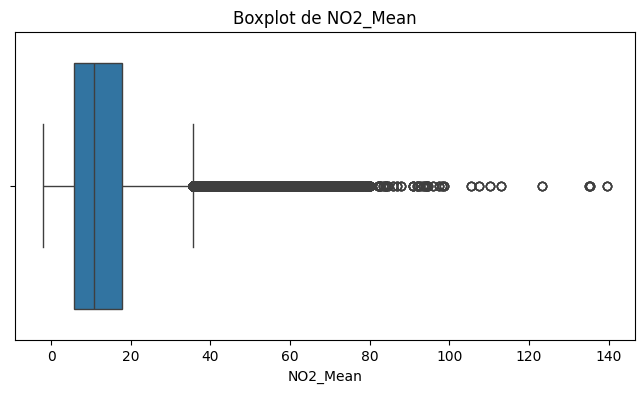

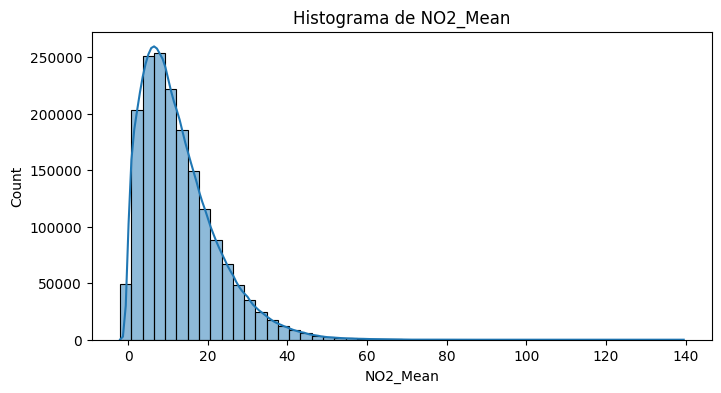

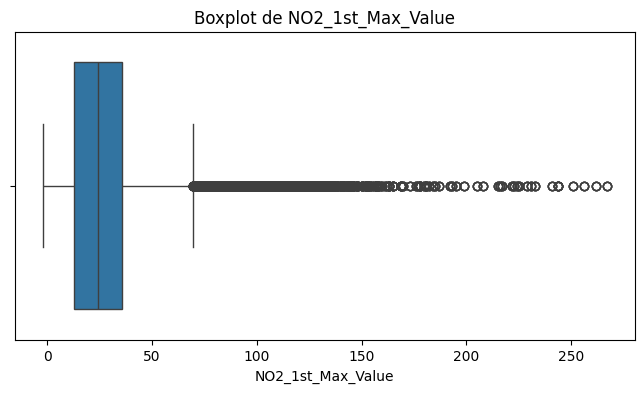

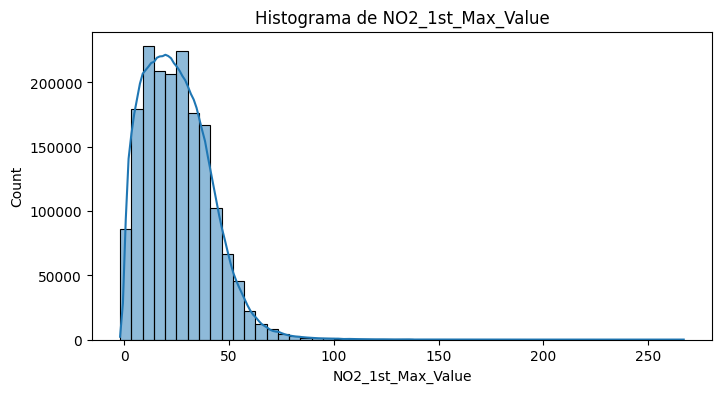

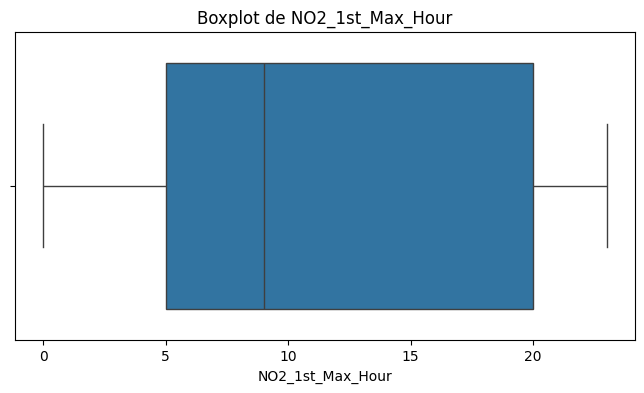

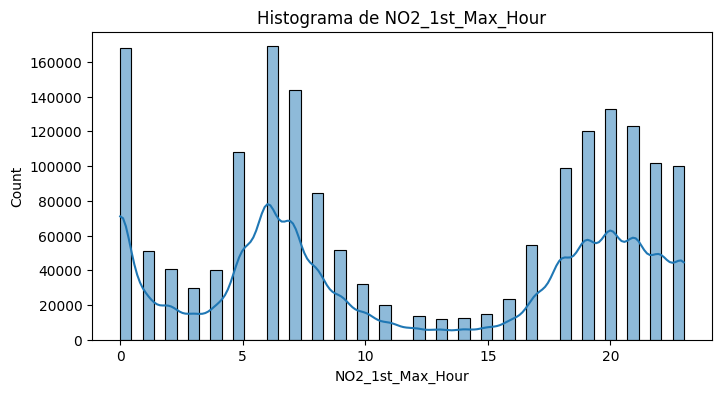

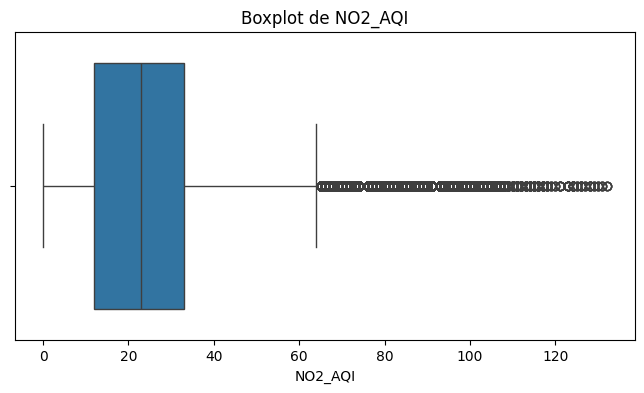

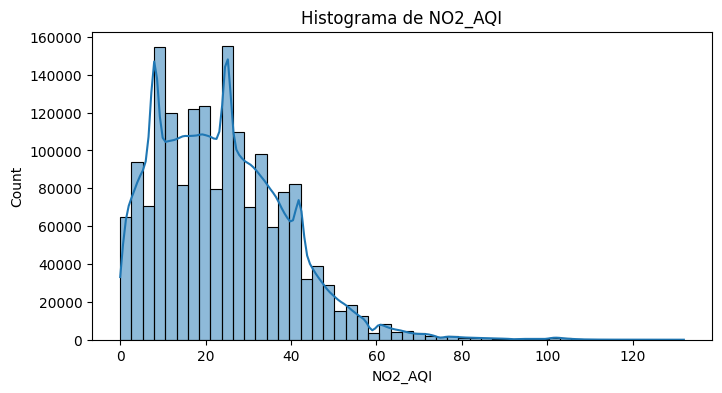

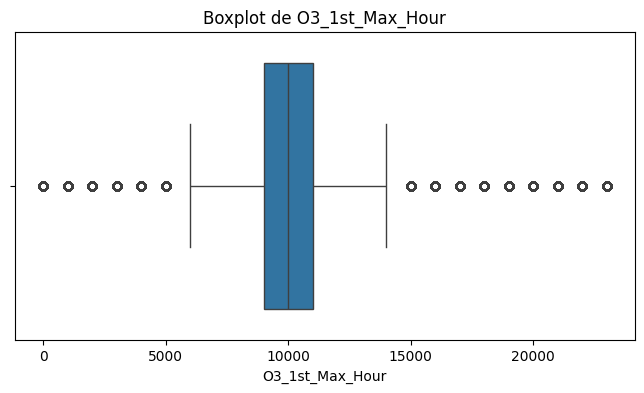

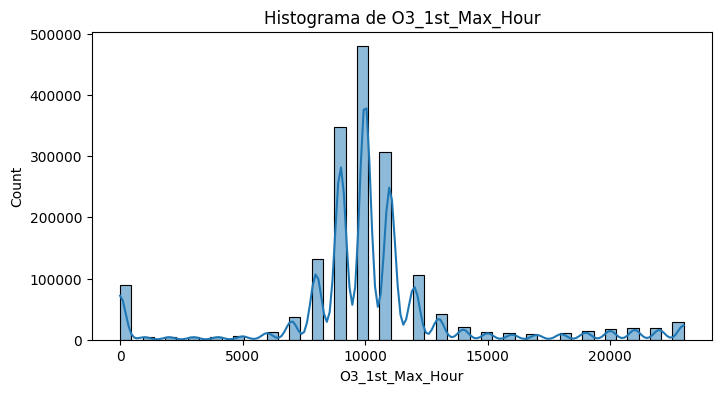

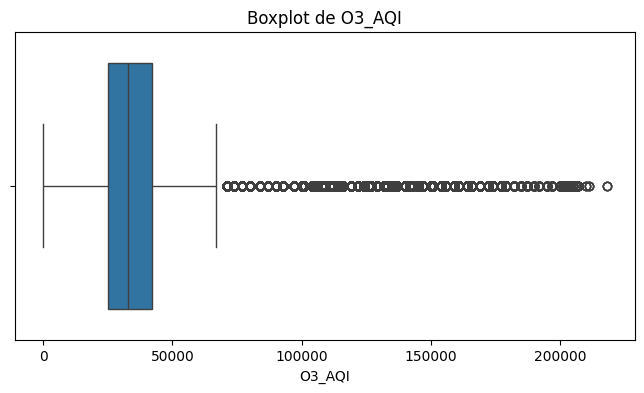

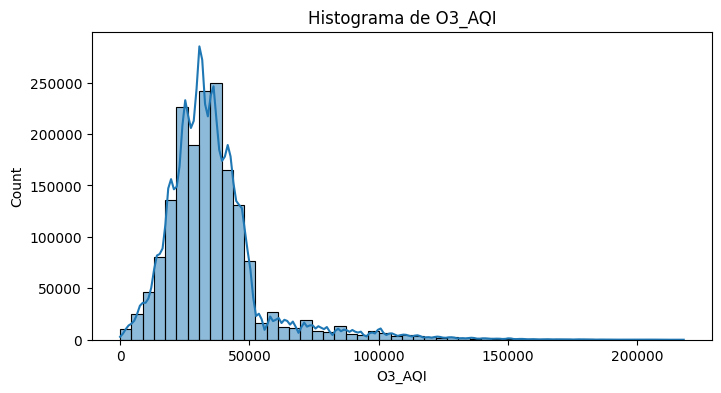

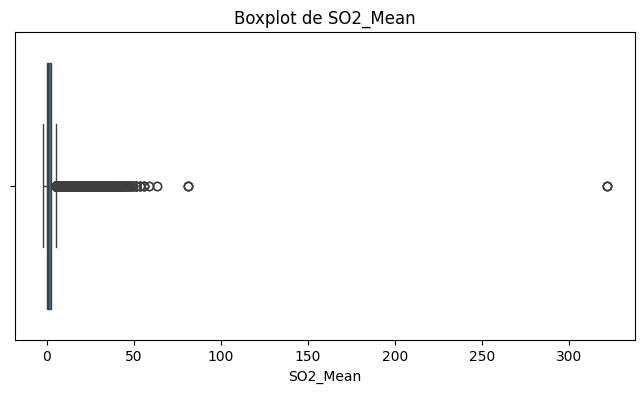

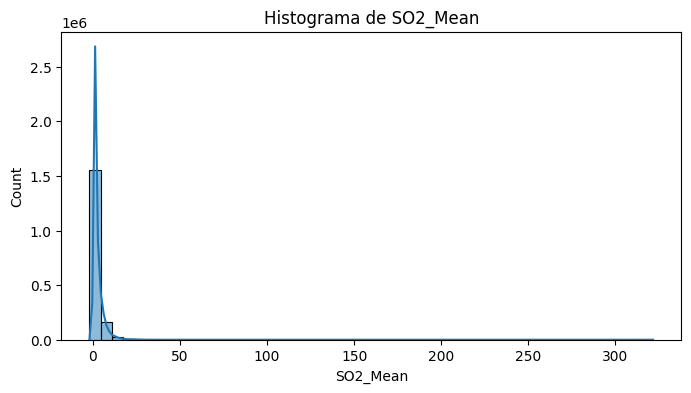

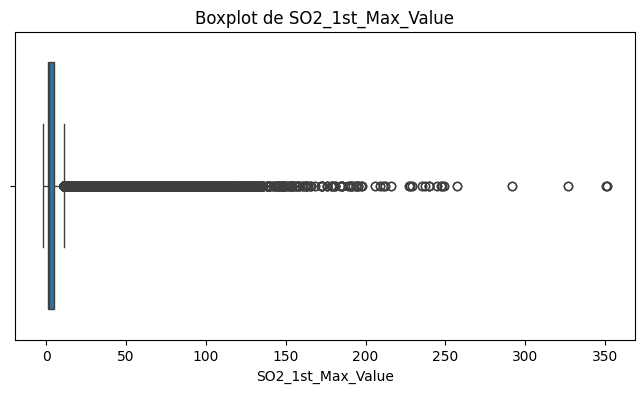

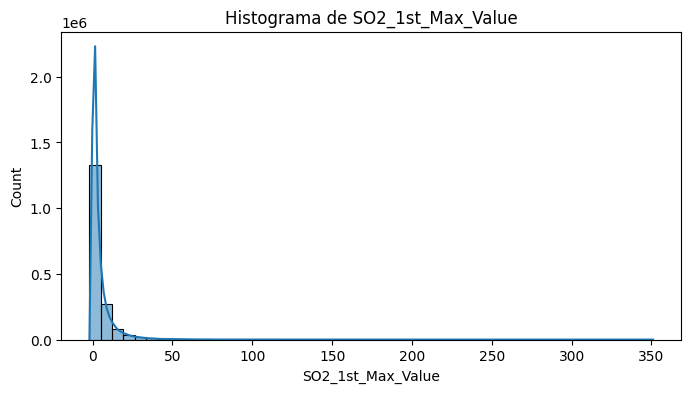

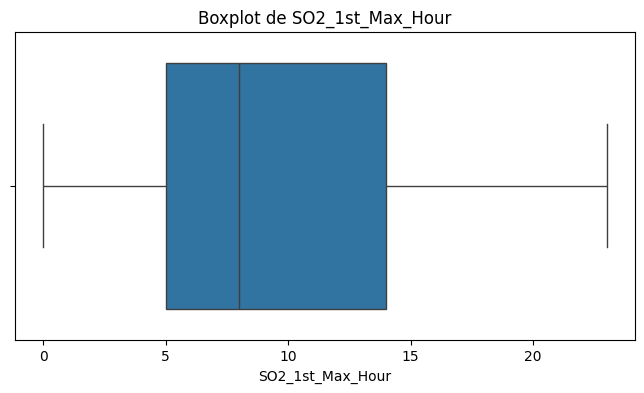

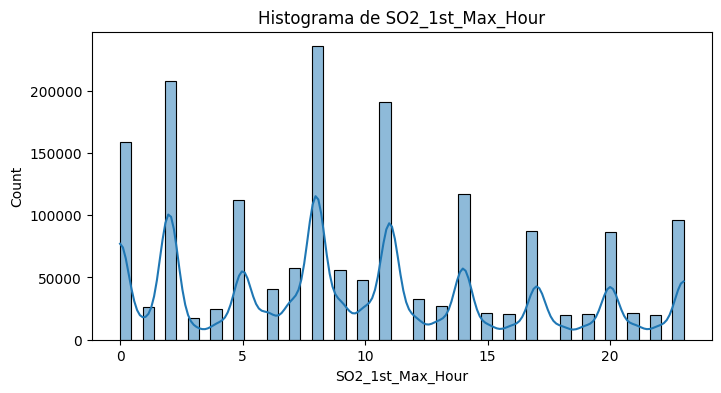

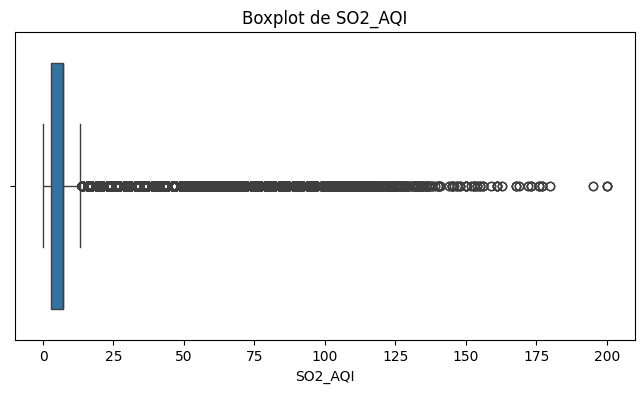

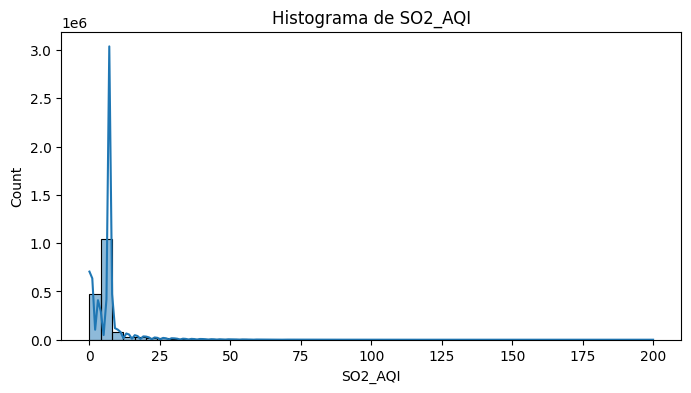

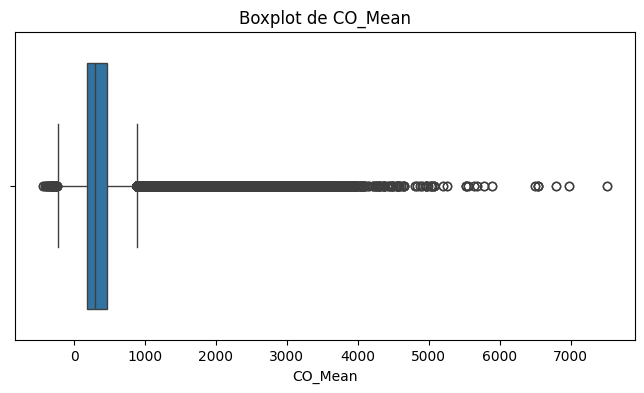

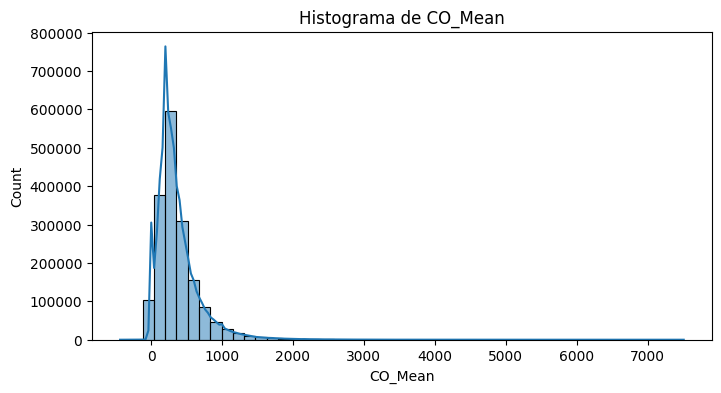

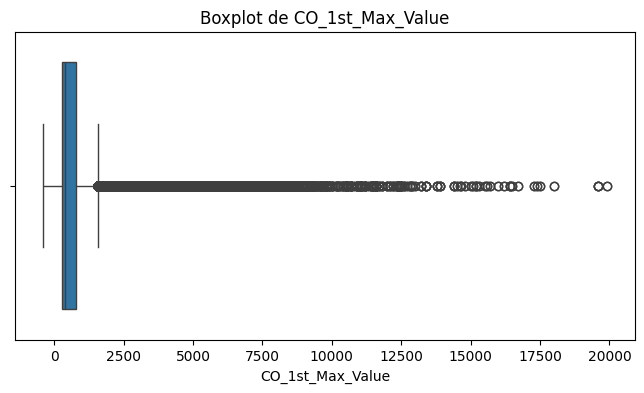

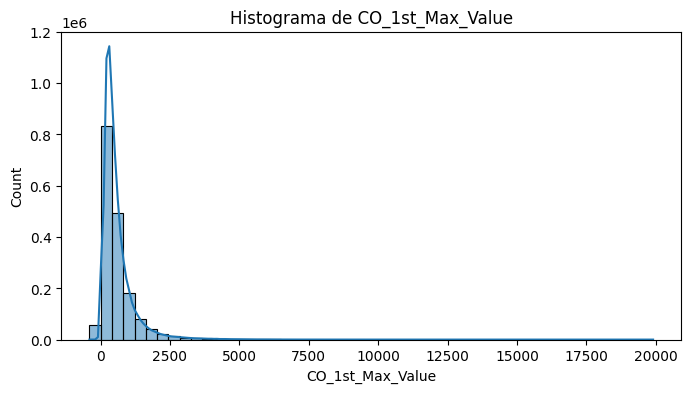

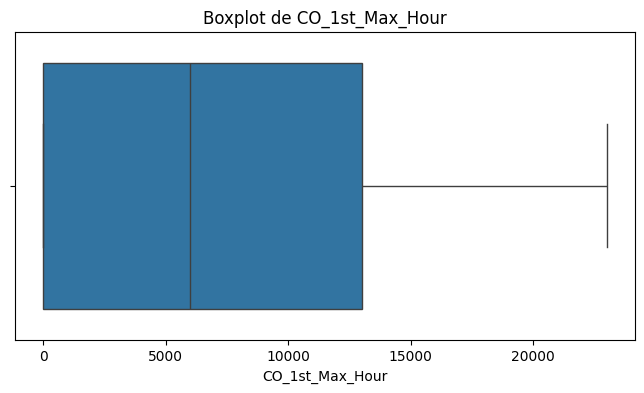

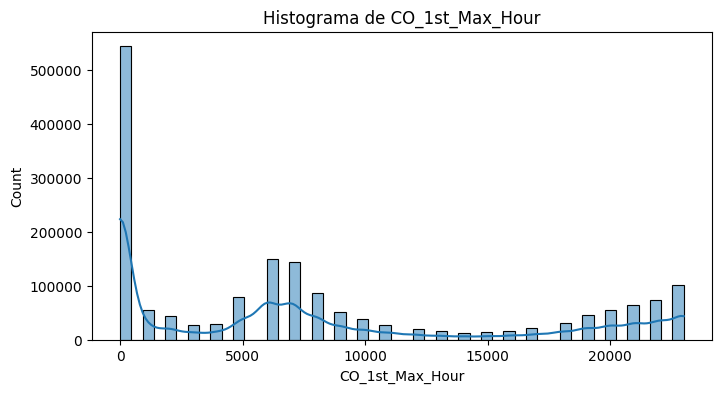

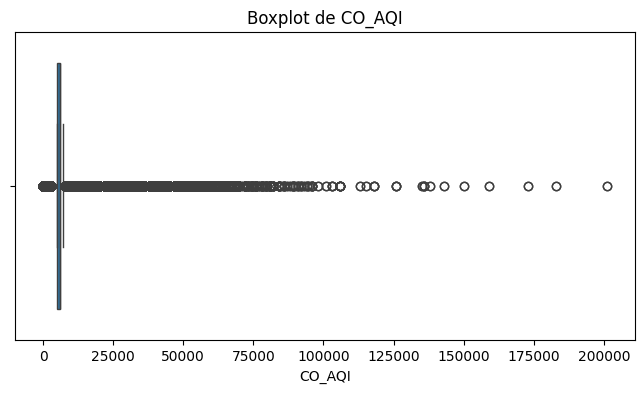

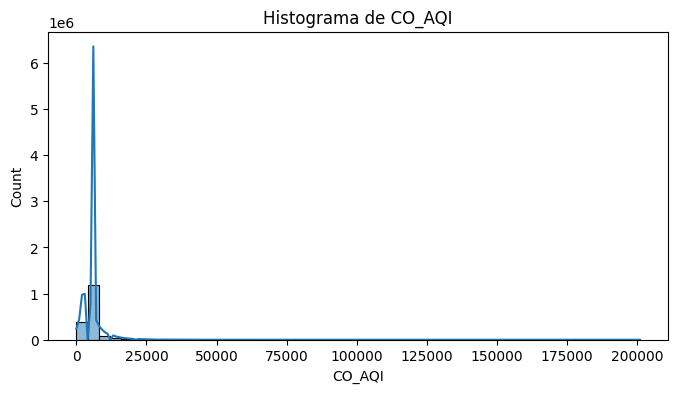

In [25]:
for col in cols_to_analyze:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

Para identificar valores físicamente imposibles de contaminantes atmosféricos como NO₂, O₃, SO₂ y CO, es fundamental distinguir entre los límites normativos establecidos por organismos como la Unión Europea (UE) y la Organización Mundial de la Salud (OMS), y las concentraciones que exceden cualquier nivel plausible en condiciones reales.

🔎 Límites Normativos vs. Valores Físicamente Imposibles
Límites Normativos: Definidos por la UE y la OMS para proteger la salud humana y el medio ambiente. Por ejemplo, la OMS recomienda para el NO₂ un límite de 200 µg/m³ como media de una hora.

Valores Físicamente Imposibles: Concentraciones que superan ampliamente cualquier nivel registrado en condiciones reales y que suelen deberse a errores de medición o fallos en los sensores. Por ejemplo, un valor de NO₂ de 1,000 µg/m³ sería inverosímil en condiciones atmosféricas normales.

📊 Valores Máximos Plausibles para Cada Contaminante
A continuación, se presentan los valores máximos plausibles para cada contaminante, basados en datos históricos y estudios científicos:

Dióxido de Nitrógeno (NO₂):

Límite normativo: 200 µg/m³ (media de 1 hora)

Valor físicamente imposible: > 500 µg/m³


Ozono (O₃):

Límite normativo: 180 µg/m³ (umbral de información)

Valor físicamente imposible: > 300 µg/m³
miteco.gob.es

Dióxido de Azufre (SO₂):

Límite normativo: 350 µg/m³ (media de 1 hora)

Valor físicamente imposible: > 1,000 µg/m³

Monóxido de Carbono (CO):

Límite normativo: 10 mg/m³ (media de 8 horas)

Valor físicamente imposible: > 50 mg/m³



In [26]:
def count_out_of_limit_cases(df, limits):
    """
    Cuenta cuántos valores exceden los límites oficiales por columna.

    Parámetros:
    - df: DataFrame de pandas con tus datos
    - limits: diccionario con {'columna': valor_límite}

    Retorna:
    - resumen: diccionario con {'columna': cantidad_excedida}
    - total_excedidos: suma total de todos los casos fuera de rango
    """
    out_of_limit_counts = {}

    for col, threshold in limits.items():
        if col in df.columns:
            count_exceeding = (df[col] > threshold).sum()
            out_of_limit_counts[col] = count_exceeding

    total_out_of_limit = sum(out_of_limit_counts.values())

    return out_of_limit_counts, total_out_of_limit

# Define los límites
limits_norms = {
    "NO2_Mean": 21.3,             # 40 µg/m³ ≈ 21.3 ppb (anual)
    "NO2_1st_Max_Value": 106.3,   # 200 µg/m³ ≈ 106.3 ppb (1h)
    "NO2_AQI": 100,               # AQI índice, no concentración

    "O3_AQI": 100,                # AQI índice, no concentración
    "O3_1st_Max_Value": 61.1,     # 120 µg/m³ ≈ 61.1 ppb (8h)

    "SO2_Mean": 7.6,              # 20 µg/m³ ≈ 7.6 ppb (anual, aprox.)
    "SO2_1st_Max_Value": 190.7,   # 500 µg/m³ ≈ 190.7 ppb (1h, aprox.)
    "SO2_AQI": 100,               # AQI índice, no concentración

    "CO_Mean": 4_000,             # 4 mg/m³ ≈ 4,000 ppb (OMS, 24h)
    "CO_1st_Max_Value": 35_000,   # 35 ppm ≈ 35,000 ppb (1h)
    "CO_AQI": 100                 # AQI índice, no concentración
}

limits = {
    "NO2_Mean": 266.2,             # 500 µg/m³ ≈ 266.2 ppb
    "NO2_1st_Max_Value": 266.2,    # Igual: umbral físicamente imposible

    "O3_1st_Max_Value": 152.5,     # 300 µg/m³ ≈ 152.5 ppb

    "SO2_Mean": 380,              # 1000 µg/m³ ≈ 380 ppb
    "SO2_1st_Max_Value": 380,     # Igual: umbral físicamente imposible

    "CO_Mean": 43_600,            # 50 mg/m³ ≈ 43,600 ppb
    "CO_1st_Max_Value": 43_600    # Igual: umbral físicamente imposible
}


# Llama a la función
resumen, total = count_out_of_limit_cases(df, limits)

# Imprime resultados
print("Resumen de valores que exceden los límites oficiales:")
for col, count in resumen.items():
    print(f"{col}: {count} casos")

print(f"\nTotal de registros fuera de límites oficiales: {total}")

Resumen de valores que exceden los límites oficiales:
NO2_Mean: 0 casos
NO2_1st_Max_Value: 4 casos
SO2_Mean: 0 casos
SO2_1st_Max_Value: 0 casos
CO_Mean: 0 casos
CO_1st_Max_Value: 0 casos

Total de registros fuera de límites oficiales: 4


El resumen indica que únicamente 4 registros superan los límites físicamente imposibles establecidos para los contaminantes analizados. Esto sugiere que la calidad del dataset es muy buena y que la mayoría de las mediciones se encuentran dentro de rangos plausibles. Aunque la cantidad de valores extremos es muy baja, es recomendable revisar esos casos puntuales para confirmar si corresponden a errores de medición o eventos excepcionales. El siguiente paso podría ser un análisis espacial y temporal para detectar posibles patrones en las concentraciones, así como validar la veracidad de los datos extremos.

In [27]:
# Extraer registros que superan el límite físicamente imposible para NO2_1st_Max_Value
# Filtramos los registros
df_NO2_imposibles = df[df["NO2_1st_Max_Value"] > 266.2]

# Mostrar los registros sospechosos
print("Registros con valores físicamente imposibles en NO2_1st_Max_Value:")
print(df_NO2_imposibles)

Registros con valores físicamente imposibles en NO2_1st_Max_Value:
         State_Code  County_Code  Site_Num  NO2_Mean  NO2_1st_Max_Value  \
12054             4           13      3003  135.1875              267.0   
128726            4           13      3003  135.1875              267.0   
1549005           4           13      3003  135.1875              267.0   
1644203           4           13      3003  135.1875              267.0   

         NO2_1st_Max_Hour  NO2_AQI  O3_1st_Max_Hour   O3_AQI  SO2_Mean  ...  \
12054                  20      132          10000.0  34000.0  1.871429  ...   
128726                 20      132          10000.0  34000.0  1.871429  ...   
1549005                20      132          10000.0  34000.0  1.863636  ...   
1644203                20      132          10000.0  34000.0  1.863636  ...   

         State_South Dakota  State_Tennessee  State_Texas  State_Utah  \
12054                     0                0            0           0   
128726         

Se eliminarán los 4 registros que presentan valores físicamente imposibles en la variable NO2_1st_Max_Value, ya que superan el umbral máximo teóricamente alcanzable en condiciones atmosféricas reales. Estos valores no representan eventos extremos válidos, sino errores de medición o fallos en el sensor, especialmente considerando que se repiten con los mismos valores y condiciones. Dado que son casos aislados y representan una fracción insignificante del total de datos, su eliminación no afectará el análisis estadístico ni la validez de los resultados.

In [28]:
# Eliminamos los registros que lo superan
df = df[df["NO2_1st_Max_Value"] <= 266.2]

Para hacer un analisis mas preciso por estado y por tiempo utilizaremos el dataset sin limpiar

In [29]:
if None in df_raw.columns:
    df_raw = df_raw.drop(columns=[None])
print(df_raw.columns)

Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'Address',
       'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Units',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Units',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Units', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'],
      dtype='object')


In [30]:
# Seleccionar columnas con gases
cols_interes = [col for col in df_raw.columns if any(gas in str(col) for gas in ["NO2", "O3", "SO2", "CO"])]

# Excluir "_Units" y "_Max_Hour"
cols_interes = [
    col for col in cols_interes
    if not (str(col).endswith("_Units") or str(col).endswith("_Max_Hour"))
]

# Separar en tres listas
cols_mean = [col for col in cols_interes if str(col).endswith("_Mean")]
cols_aqi = [col for col in cols_interes if str(col).endswith("_AQI")]
cols_max_value = [col for col in cols_interes if str(col).endswith("_1st_Max_Value")]

print("Cols Mean:", cols_mean)
print("Cols AQI:", cols_aqi)
print("Cols 1st Max Value:", cols_max_value)


Cols Mean: ['NO2_Mean', 'O3_Mean', 'SO2_Mean', 'CO_Mean']
Cols AQI: ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
Cols 1st Max Value: ['NO2_1st_Max_Value', 'O3_1st_Max_Value', 'SO2_1st_Max_Value', 'CO_1st_Max_Value']


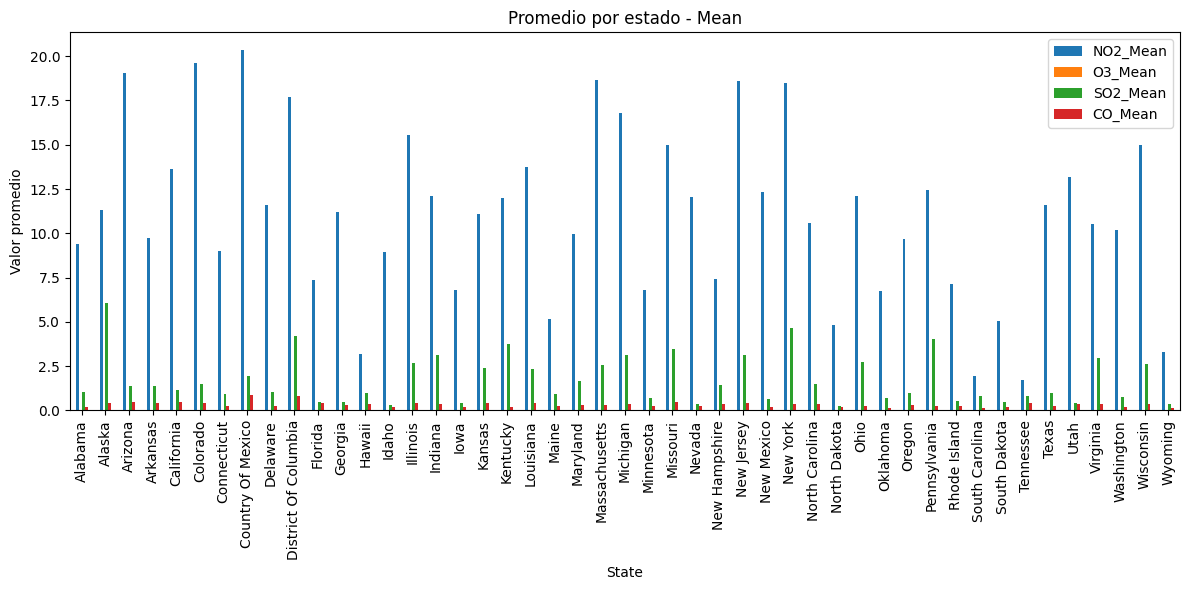

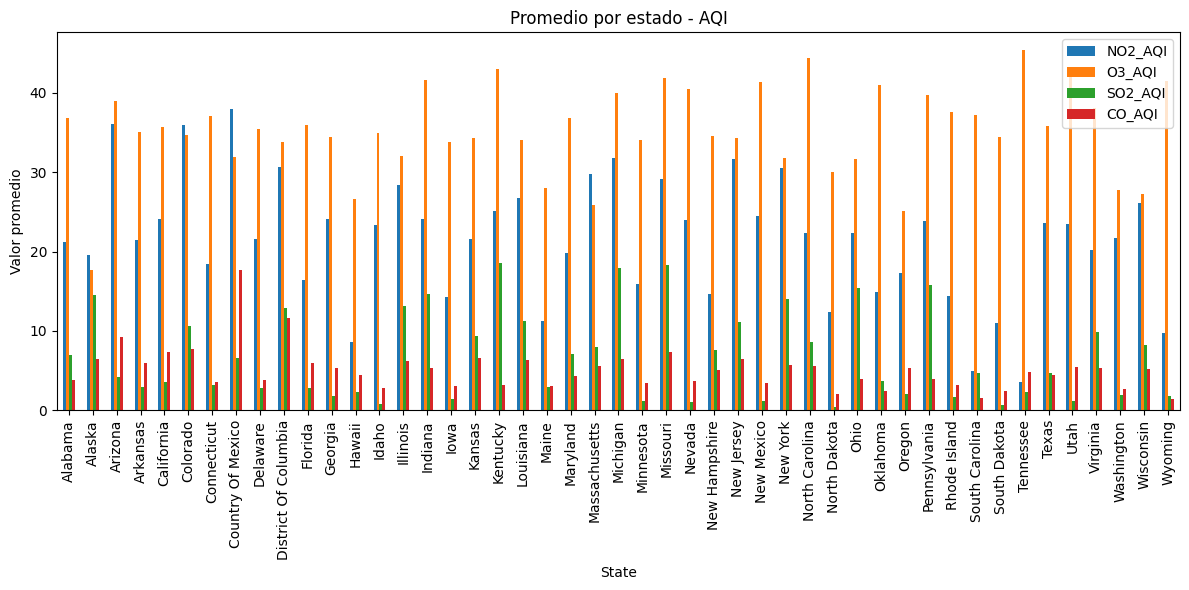

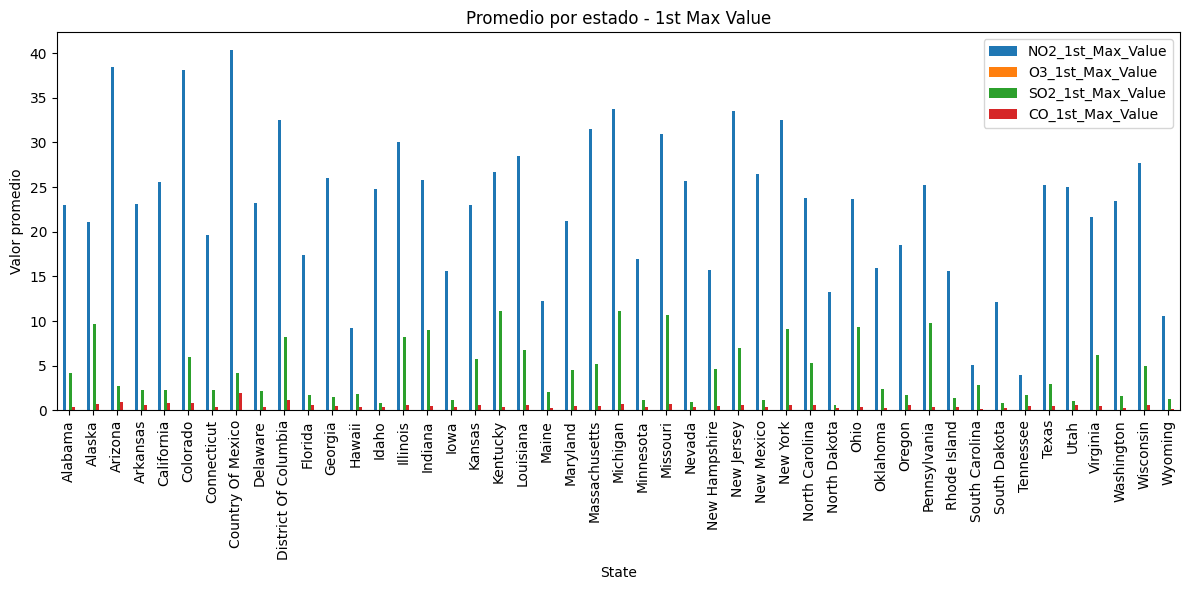

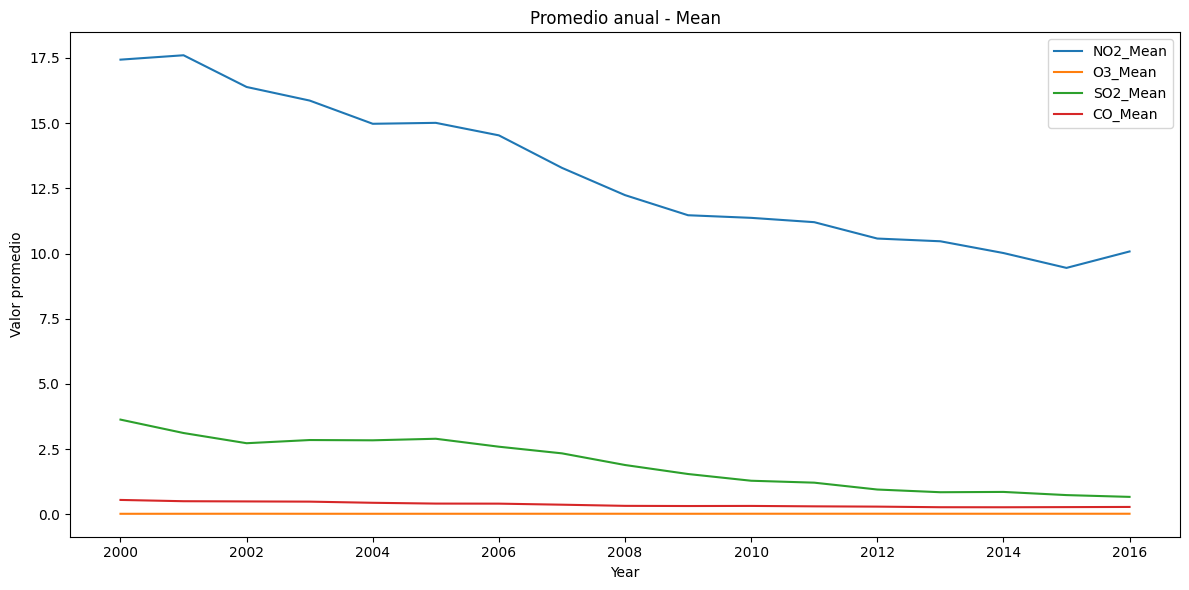

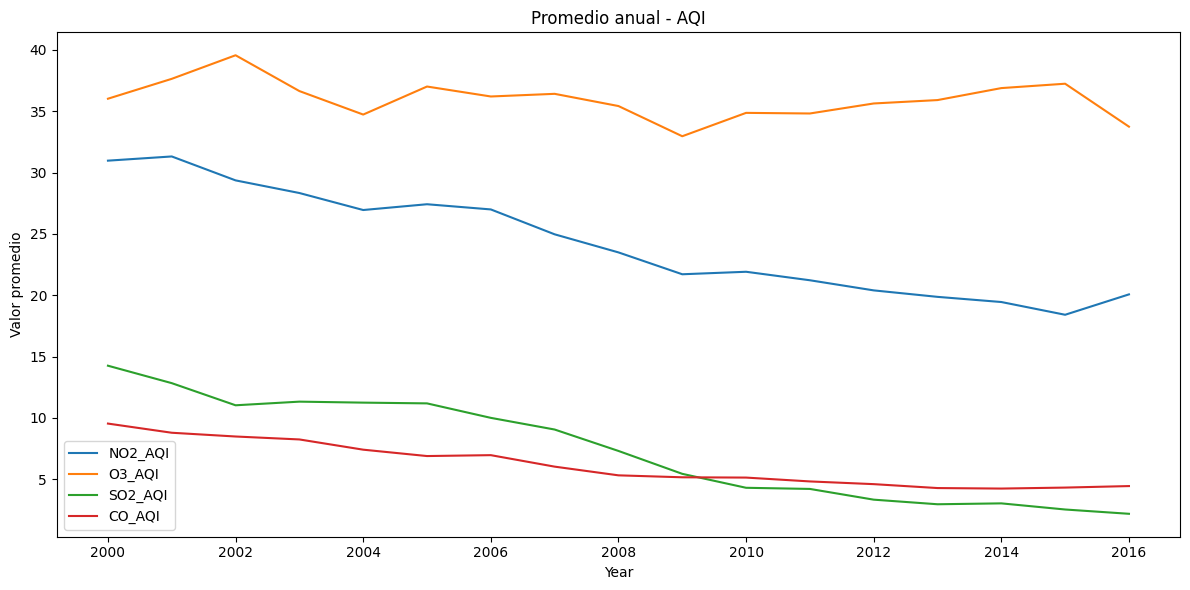

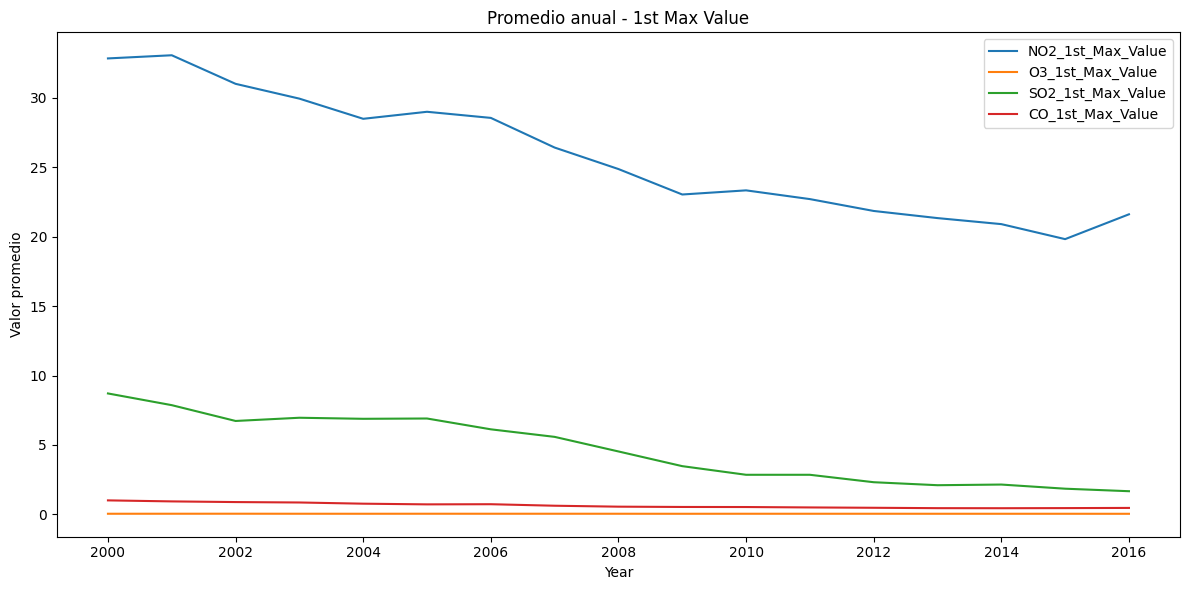

                      min       mean        75%         max
NO2_Mean          -2.0000  12.821930  17.713636  139.541667
NO2_1st_Max_Value -2.0000  25.414848  35.700000  267.000000
NO2_AQI            0.0000  23.898217  33.000000  132.000000
O3_Mean            0.0000   0.026125   0.033917    0.095083
O3_1st_Max_Value   0.0000   0.039203   0.048000    0.141000
O3_AQI             0.0000  36.050121  42.000000  218.000000
SO2_Mean          -2.0000   1.870364   2.325000  321.625000
SO2_1st_Max_Value -2.0000   4.492185   5.000000  351.000000
SO2_AQI            0.0000   7.115945   9.000000  200.000000
CO_Mean           -0.4375   0.368218   0.466667    7.508333
CO_1st_Max_Value  -0.4000   0.620107   0.800000   19.900000
CO_AQI             0.0000   5.996595   8.000000  201.000000


In [31]:
# ESPACIAL: promedio por estado
for group_name, col_list in [("Mean", cols_mean), ("AQI", cols_aqi), ("1st Max Value", cols_max_value)]:
    if col_list:  # solo si la lista no está vacía
        spatial_means = df_raw.groupby("State")[col_list].mean()
        spatial_means.plot(kind="bar", figsize=(12,6))
        plt.title(f"Promedio por estado - {group_name}")
        plt.ylabel("Valor promedio")
        plt.tight_layout()
        plt.show()

# TEMPORAL: promedio por año
df_raw["Date_Local"] = pd.to_datetime(df_raw["Date_Local"])
df_raw["Year"] = df_raw["Date_Local"].dt.year

for group_name, col_list in [("Mean", cols_mean), ("AQI", cols_aqi), ("1st Max Value", cols_max_value)]:
    if col_list:  # solo si la lista no está vacía
        temporal_means = df_raw.groupby("Year")[col_list].mean()
        temporal_means.plot(figsize=(12,6))
        plt.title(f"Promedio anual - {group_name}")
        plt.ylabel("Valor promedio")
        plt.tight_layout()
        plt.show()

# # CHECK DE OUTLIERS REALES
# pollutants = ["NO2_Mean", "O3_Mean", "SO2_Mean", "CO_Mean"]
# for col in pollutants:
#     plt.figure(figsize=(8, 4)) # Es buena práctica crear una nueva figura para cada gráfico
#     sns.boxplot(x=df_raw[col])
#     plt.title(f"Distribución y posibles outliers: {col}")
#     plt.show()

# EXTRA: resumen estadístico
print(df_raw[cols_interes].describe().T[["min", "mean", "75%", "max"]])

Estos gráficos e información estadística proporcionan una visión de la calidad del aire en diferentes estados y a lo largo del tiempo. Los datos muestran concentraciones de NO2, O3, SO2 y CO, tanto sus valores promedio (Mean) como sus valores máximos (1st_Max_Value) y los valores del Índice de Calidad del Aire (AQI).

En los gráficos superiores, se observa que la calidad del aire varía significativamente entre los estados. Algunos estados presentan picos de contaminación notablemente más altos, como se ve en los valores máximos de NO2 y O3. Los gráficos inferiores, que muestran tendencias anuales, revelan una disminución generalizada en las concentraciones promedio y máximas de NO2, SO2 y CO a lo largo de los años (desde el 2000 hasta el 2016), lo cual sugiere mejoras en la calidad del aire para estos contaminantes. Sin embargo, los niveles de O3 se mantienen más estables o incluso muestran ligeros aumentos en algunos años.

Las estadísticas resumen estos hallazgos:

NO2, SO2 y CO: Tienen valores máximos significativamente más altos que sus promedios, indicando episodios de alta contaminación. La tendencia general es a la baja.
O3: Sus promedios y máximos son relativamente bajos, pero su AQI es considerablemente más alto que el de los otros contaminantes, lo que sugiere que incluso concentraciones bajas de O3 pueden contribuir a un AQI alto. La disminución de O3 no es tan marcada como la de los otros contaminantes.
Valores negativos: La presencia de valores mínimos negativos para NO2_Mean, NO2_1st_Max_Value, SO2_Mean, SO2_1st_Max_Value, CO_Mean y CO_1st_Max_Value podría indicar errores en la recolección de datos o en la forma en que se registraron estos valores (por ejemplo, como valores que están por debajo de un umbral de detección o artefactos). Sin embargo, esto es poco común para la concentración de contaminantes.
En resumen, si bien ha habido mejoras notables en la calidad del aire con respecto a NO2, SO2 y CO, el ozono sigue siendo un desafío, y la variabilidad regional en la contaminación atmosférica es un factor importante a considerar.

Ahora analizaremos los valores negativos para saber y estar seguro que son errores de mediciones o valores atipicos

In [32]:
# Generar resumen estadístico solo para cols_interes
desc = df_raw[cols_interes].describe()

# Seleccionar columnas con mínimo negativo
cols_with_negatives = [col for col in cols_interes if desc[col]["min"] < 0]

print("Columnas con valores mínimos negativos:")
print(cols_with_negatives)

# Contar valores negativos por columna
for col in cols_with_negatives:
    negative_count = (df_raw[col] < 0).sum()
    print(f"{col:<25} -> {negative_count:>8} valores negativos")

Columnas con valores mínimos negativos:
['NO2_Mean', 'NO2_1st_Max_Value', 'SO2_Mean', 'SO2_1st_Max_Value', 'CO_Mean', 'CO_1st_Max_Value']
NO2_Mean                  ->      896 valores negativos
NO2_1st_Max_Value         ->      184 valores negativos
SO2_Mean                  ->    22690 valores negativos
SO2_1st_Max_Value         ->     8286 valores negativos
CO_Mean                   ->     1064 valores negativos
CO_1st_Max_Value          ->      198 valores negativos


In [33]:
# Lista para guardar cada fila del resumen
resumen_negativos = []

for col in cols_with_negatives:
    negativos = df_raw[df_raw[col] < 0][col]
    resumen_negativos.append({
        "Columna": col,
        "Negativos": negativos.count(),
        "Min_neg": negativos.min(),
        "Max_neg": negativos.max(),
        "Mean_neg": negativos.mean(),
        "Valores_negativos": negativos.astype(str).tolist()
    })

# Crear DataFrame resumen
df_negativos = pd.DataFrame(resumen_negativos)

# Mostrarlo ordenado por cantidad de negativos (de mayor a menor)
df_negativos = df_negativos.sort_values(by="Negativos", ascending=False)

print(df_negativos)


             Columna  Negativos  Min_neg   Max_neg  Mean_neg  \
2           SO2_Mean      22690  -2.0000 -0.004167 -0.213477   
3  SO2_1st_Max_Value       8286  -2.0000 -0.100000 -0.277854   
4            CO_Mean       1064  -0.4375 -0.000364 -0.077272   
0           NO2_Mean        896  -2.0000 -0.004545 -0.511459   
5   CO_1st_Max_Value        198  -0.4000 -0.010000 -0.148586   
1  NO2_1st_Max_Value        184  -2.0000 -0.100000 -0.610870   

                                   Valores_negativos  
2  [-0.05, -0.05, -0.227273, -0.227273, -0.214286...  
3  [-0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0....  
4  [-0.015385, -0.015385, -0.019048, -0.009524, -...  
0  [-0.279167, -0.279167, -0.279167, -0.279167, -...  
5  [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....  
1  [-0.2, -0.2, -0.2, -0.2, -0.9, -0.9, -0.9, -0....  


Se decide reemplazar los valores negativos por 0 porque, en el contexto de concentraciones de contaminantes atmosféricos, los valores negativos no tienen sentido físico y representan errores de medición o procesamiento. Dado que algunas columnas presentan miles de registros negativos, eliminarlos supondría una pérdida considerable de información. Usar la media como reemplazo introduce un sesgo artificial, mientras que el cero representa el mínimo teórico válido. Esta decisión prioriza mantener la integridad física de los datos sin distorsionar la distribución original. Además, es una solución sencilla y segura que evita añadir supuestos innecesarios.

In [34]:
for col in cols_with_negatives:
    df_raw[col] = df_raw[col].apply(lambda x: max(x, 0))

# Verificar valores negativos por columna
for col in cols_with_negatives:
    negative_count = (df_raw[col] < 0).sum()
    print(f"{col:<25} -> {negative_count:>8} valores negativos")

NO2_Mean                  ->        0 valores negativos
NO2_1st_Max_Value         ->        0 valores negativos
SO2_Mean                  ->        0 valores negativos
SO2_1st_Max_Value         ->        0 valores negativos
CO_Mean                   ->        0 valores negativos
CO_1st_Max_Value          ->        0 valores negativos


Ahora se revisará el cambio de los valores negativos en el analisis general de outliers y se revisará por los outliers positivos para su poesterior analisis y toma de decisiones por si hay que eliminarlso o aplicarles alguna transformacion

In [35]:
print(df_raw[cols_interes].describe().T[["min", "mean", "75%", "max"]])

                   min       mean        75%         max
NO2_Mean           0.0  12.822192  17.713636  139.541667
NO2_1st_Max_Value  0.0  25.414913  35.700000  267.000000
NO2_AQI            0.0  23.898217  33.000000  132.000000
O3_Mean            0.0   0.026125   0.033917    0.095083
O3_1st_Max_Value   0.0   0.039203   0.048000    0.141000
O3_AQI             0.0  36.050121  42.000000  218.000000
SO2_Mean           0.0   1.873137   2.325000  321.625000
SO2_1st_Max_Value  0.0   4.493503   5.000000  351.000000
SO2_AQI            0.0   7.115945   9.000000  200.000000
CO_Mean            0.0   0.368265   0.466667    7.508333
CO_1st_Max_Value   0.0   0.620124   0.800000   19.900000
CO_AQI             0.0   5.996595   8.000000  201.000000


conteo de outliers

In [36]:
# Diccionario para almacenar el número de outliers por columna
outlier_counts = {}

# Calcular outliers por el método IQR
for col in cols_interes:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# Mostrar los resultados
print("Número de outliers por columna:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

total_outliers = sum(outlier_counts.values())
print(f"\nNúmero total de outliers en todas las columnas: {total_outliers}")

Número de outliers por columna:
NO2_Mean: 48083 outliers
NO2_1st_Max_Value: 17598 outliers
NO2_AQI: 22828 outliers
O3_Mean: 6888 outliers
O3_1st_Max_Value: 29428 outliers
O3_AQI: 102862 outliers
SO2_Mean: 142365 outliers
SO2_1st_Max_Value: 167581 outliers
SO2_AQI: 67943 outliers
CO_Mean: 103059 outliers
CO_1st_Max_Value: 115148 outliers
CO_AQI: 35972 outliers

Número total de outliers en todas las columnas: 859755


In [37]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy.spatial.distance import mahalanobis

# Supón que ya tienes tu DataFrame llamado df_raw
df_out = df_raw.copy()
cols = df_out.select_dtypes(include=np.number).columns  # Solo columnas numéricas

# 1. Descripción general
summary = df_out[cols].describe().T

# 2. Método IQR
def detect_iqr_outliers(df, cols):
    outlier_flags = pd.DataFrame(index=df.index)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_flags[col] = ((df[col] < lower) | (df[col] > upper)).astype(int)
    return outlier_flags.sum(axis=1) > 0

iqr_outliers = detect_iqr_outliers(df_out, cols)

# 3. Z-score
z_scores = np.abs(zscore(df_out[cols]))
z_outliers = (z_scores > 3).any(axis=1)

# 4. Mahalanobis
cov = np.cov(df_out[cols].dropna().T)
inv_covmat = np.linalg.inv(cov)
mean = df_out[cols].mean()
maha_dist = df_out[cols].apply(lambda row: mahalanobis(row, mean, inv_covmat), axis=1)
maha_outliers = maha_dist > 3

# 5. Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_outliers = iso_forest.fit_predict(df_out[cols])
iso_outliers = iso_outliers == -1

# 6. Conteo de outliers detectados
df_outlier_flag = pd.DataFrame({
    "IQR": iqr_outliers,
    "Z-score": z_outliers,
    "Mahalanobis": maha_outliers,
    "IsolationForest": iso_outliers
})

outlier_counts = df_outlier_flag.sum().sort_values(ascending=False)
print("🔍 Número de outliers detectados por método:\n")
print(outlier_counts)

🔍 Número de outliers detectados por método:

IQR                819641
Mahalanobis        434184
Z-score            261462
IsolationForest     87333
dtype: int64


In [38]:
print(df_outlier_flag)

           IQR  Z-score  Mahalanobis  IsolationForest
0         True     True        False             True
1         True    False         True            False
2         True     True        False             True
3         True    False        False            False
4         True    False        False            False
...        ...      ...          ...              ...
1746656   True    False        False            False
1746657  False    False        False            False
1746658  False    False         True            False
1746659  False    False        False            False
1746660  False    False        False            False

[1746661 rows x 4 columns]


In [39]:
mask = df_outlier_flag.sum(axis=1) >= 2
df_clean = df[~mask].copy()

<ipython-input-39-9fae297db229>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df[~mask].copy()


In [40]:

# 2. Definir X e y
target = "O3_AQI"
X = df_clean.drop(columns=[target])
y = df_clean[target]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalar datos solo para modelos lineales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
lr = LinearRegression()
# Linear Regression
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_preds)
print(f"📊 Linear Regression R²: {lr_r2:.4f}")

📊 Linear Regression R²: 0.1631


In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
# Ridge Regression
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f"📊 Ridge Regression R²: {ridge_r2:.4f}")

📊 Ridge Regression R²: 0.1631


In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=10,
    reg_lambda=3,
    random_state=42,
    verbosity=1
)
# XGBoost
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"📊 XGBoost R²: {xgb_r2:.4f}")

📊 XGBoost R²: 0.7443


In [45]:
!pip install lightgbm

In [46]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
# LightGBM
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_r2 = r2_score(y_test, lgbm_preds)
print(f"📊 LightGBM R²: {lgbm_r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.485004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2557
[LightGBM] [Info] Number of data points in the train set: 1071303, number of used features: 67
[LightGBM] [Info] Start training from score 36065.944929
📊 LightGBM R²: 0.5526


In [47]:
# Mostrar todos los resultados juntos
results = {
    "LinearRegression": lr_r2,
    "Ridge": ridge_r2,
    "XGBoost": xgb_r2,
    "LightGBM": lgbm_r2
}

print("\n📈 Comparación final de R² sin outliers fuertes:\n")
for model, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {score:.4f}")


📈 Comparación final de R² sin outliers fuertes:

XGBoost: 0.7443
LightGBM: 0.5526
Ridge: 0.1631
LinearRegression: 0.1631


In [48]:
from sklearn.model_selection import cross_val_score

# Modelo con los mismos hiperparámetros ya ajustados
xgb_model_cv = XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=10,
    reg_lambda=3,
    random_state=42,
    verbosity=0
)

# Validación cruzada 5-fold usando R²
cv_scores = cross_val_score(xgb_model_cv, X_train, y_train, cv=5, scoring='r2')

print("📊 Validación cruzada (R²):")
print(f"Scores por fold: {cv_scores}")
print(f"Media R²: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


📊 Validación cruzada (R²):
Scores por fold: [0.74061289 0.73851007 0.73829614 0.74323611 0.74413849]
Media R²: 0.7410
Desviación estándar: 0.0024


In [49]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [50]:
from catboost import CatBoostRegressor

# Inicializar CatBoost con hiperparámetros razonables
cat_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.2,
    depth=10,
    random_seed=42,
    verbose=0  # Silencia salida extensa
)

# Entrenar CatBoost
cat_model.fit(X_train, y_train)

# Predecir
cat_preds = cat_model.predict(X_test)

# Evaluar
cat_mse = mean_squared_error(y_test, cat_preds)
cat_r2 = r2_score(y_test, cat_preds)

print(f"CatBoost - MSE: {cat_mse:.4f}")
print(f"CatBoost - R²:  {cat_r2:.4f}")


CatBoost - MSE: 144597025.7930
CatBoost - R²:  0.6316


YA se ha visto que no hay mucha diferencia quitando los outliers fuertes (quitar los outliers que en al menos 2 detecteros de outliers lo confirmen) ya que siendo mas conservador quitando los de 4 columnas se eliminarian muy pocos para que se aprecie la diferencia. Ahora se intentará hacer eliminando los valores outliers extremos y tratar los demas otliers por winsorizacion

In [51]:
# Contar cuántas columnas tienen outliers por fila
outlier_counts = df_outlier_flag.sum(axis=1)

# Filas con ≥4 outliers (fuertes)
very_strong_outliers = outlier_counts >= 4

# Filas con exactamente 1 outlier (medianos)
strong_outliers = outlier_counts >= 3

# Mostrar resultados
print(f"Total de filas: {len(df_outlier_flag)}")
print(f"Outliers fuertes (≥4 variables): {very_strong_outliers.sum()}")
print(f"Outliers medianos (≥3 variable): {strong_outliers.sum()}")

Total de filas: 1746661
Outliers fuertes (≥4 variables): 19628
Outliers medianos (≥3 variable): 123598


Se elige eliminar las filas con outliers en 4 o más columnas porque representan casos con múltiples variables extremas simultáneamente, lo que indica que esos registros son altamente atípicos y posiblemente erróneos o no representativos del comportamiento general del conjunto de datos. Al eliminar solo estos casos más severos y conservar aquellos con outliers en menos columnas, se logra un buen equilibrio entre limpieza del dataset y conservación de información útil. Además, los registros con outliers en menos columnas pueden ser tratados posteriormente mediante técnicas como la winsorización, evitando así una pérdida excesiva de datos valiosos.

In [52]:
df_clean_4_columns = df[~very_strong_outliers].copy()

<ipython-input-52-d01f0f27c7a9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_4_columns = df[~very_strong_outliers].copy()


In [53]:
cols_to_winsorize = [col for col in cols_interes if
                    col not in ['O3_Mean', 'O3_1st_Max_Value']]

📍 Columnas con alta asimetría o curtosis (sugeridas para winsorización):
['NO2_Mean', 'NO2_1st_Max_Value', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_AQI']


Index(['NO2_Mean', 'NO2_1st_Max_Value', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value',
       'CO_AQI'],
      dtype='object')

In [66]:
from scipy.stats.mstats import winsorize

def apply_winsorization(df, columnas, limits=(0.01, 0.01)):
    df_wins = df.copy()
    for col in columnas:
        data_col = df_wins[col].values
        df_wins[col] = winsorize(data_col, limits=limits)
    return df_wins

In [67]:
def compare_boxplots(before_df, after_df, columns):
    """
    Muestra comparaciones de boxplots antes y después de la winsorización.

    Parámetros:
    - before_df: DataFrame original (antes de winsorización)
    - after_df: DataFrame modificado (después de winsorización)
    - columns: Lista de columnas a comparar
    """
    sns.set(style="whitegrid")
    plt.rcParams["figure.figsize"] = (12, 5)

    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        sns.boxplot(data=before_df[col], ax=axes[0], color="salmon")
        axes[0].set_title(f"{col} - Before Winsorization", fontsize=12)
        axes[0].set_xlabel("")

        sns.boxplot(data=after_df[col], ax=axes[1], color="lightgreen")
        axes[1].set_title(f"{col} - After Winsorization", fontsize=12)
        axes[1].set_xlabel("")

        plt.suptitle(f"Boxplot Comparison: {col}", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


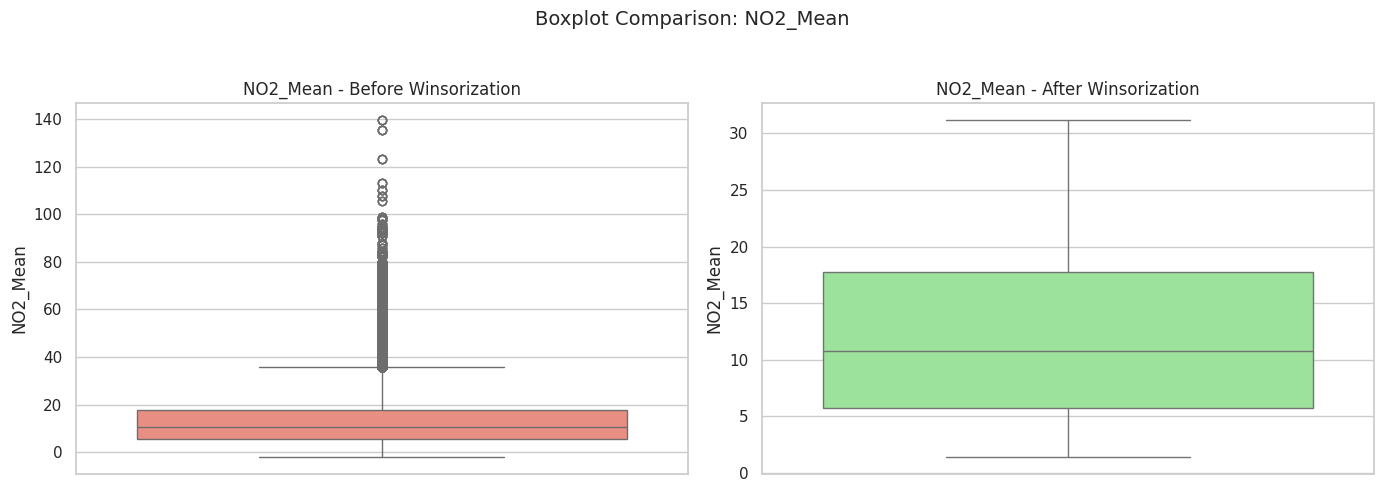

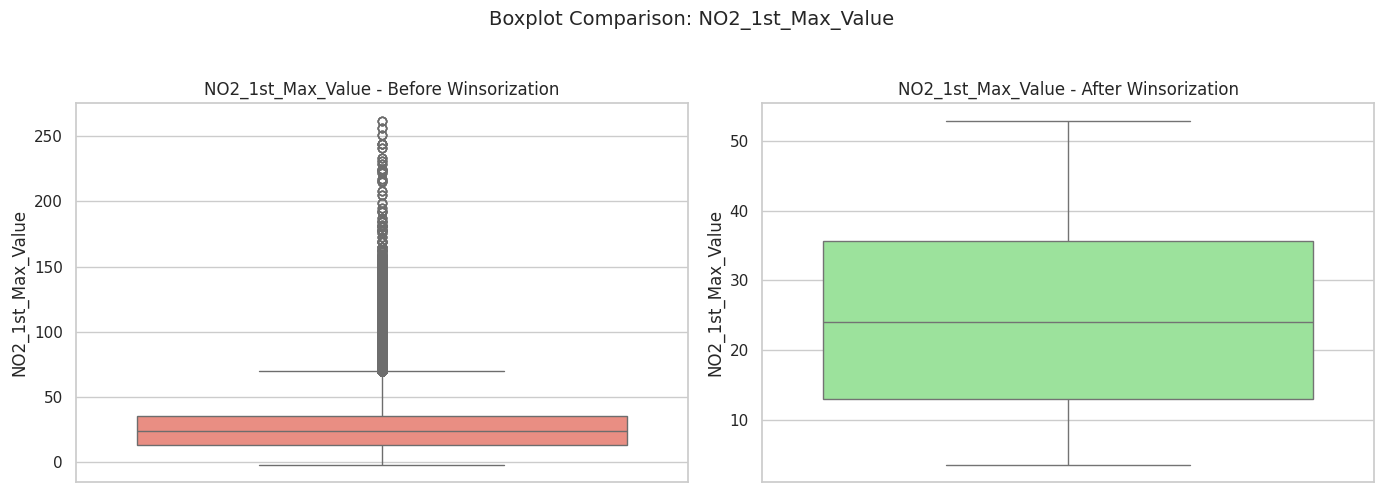

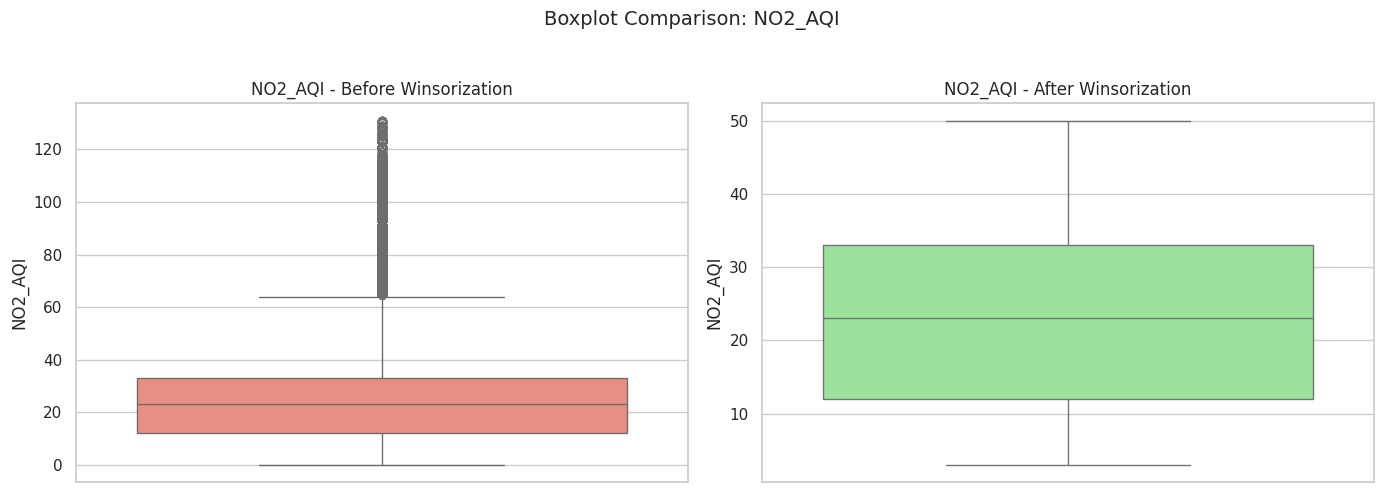

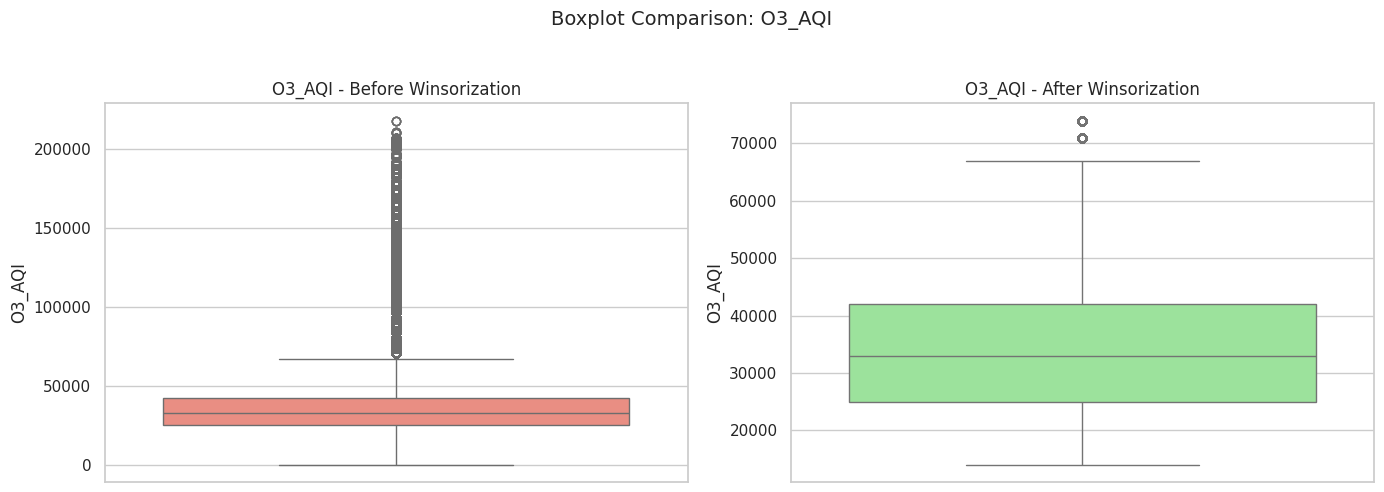

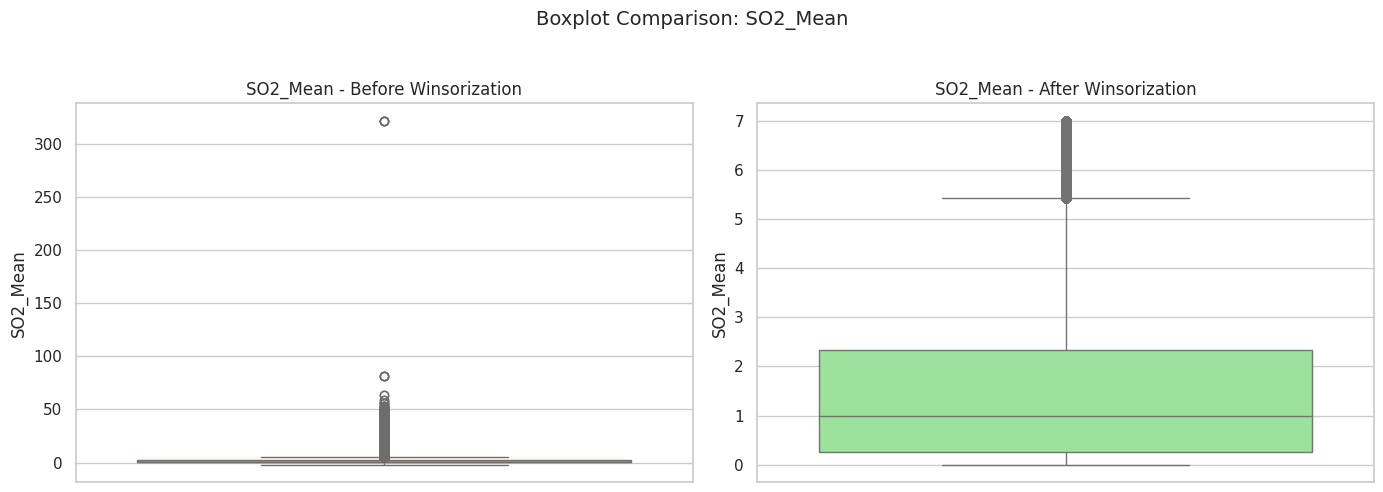

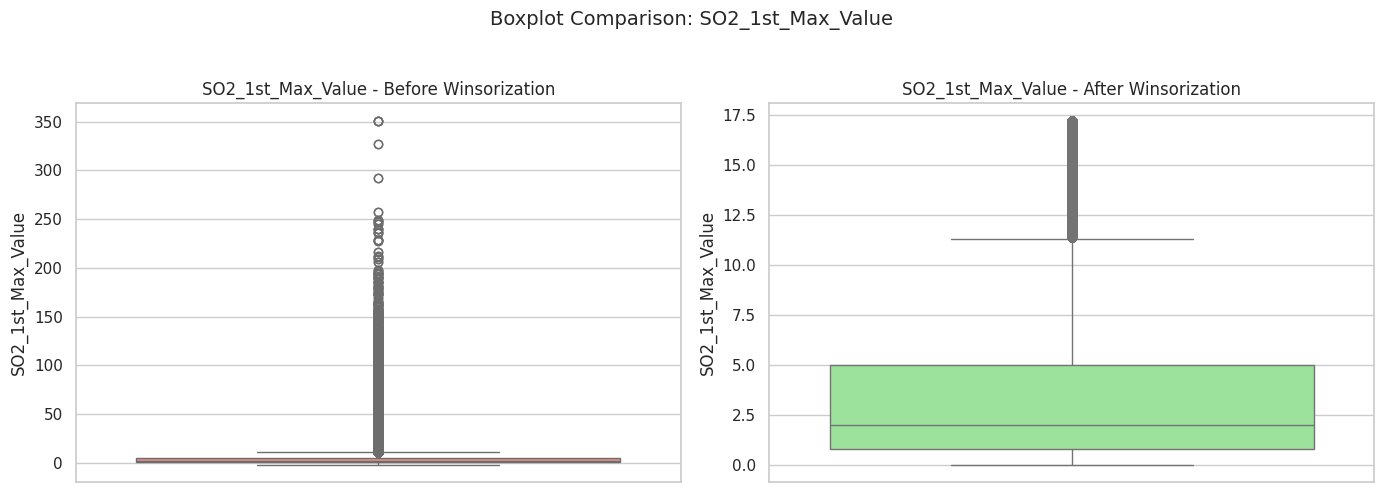

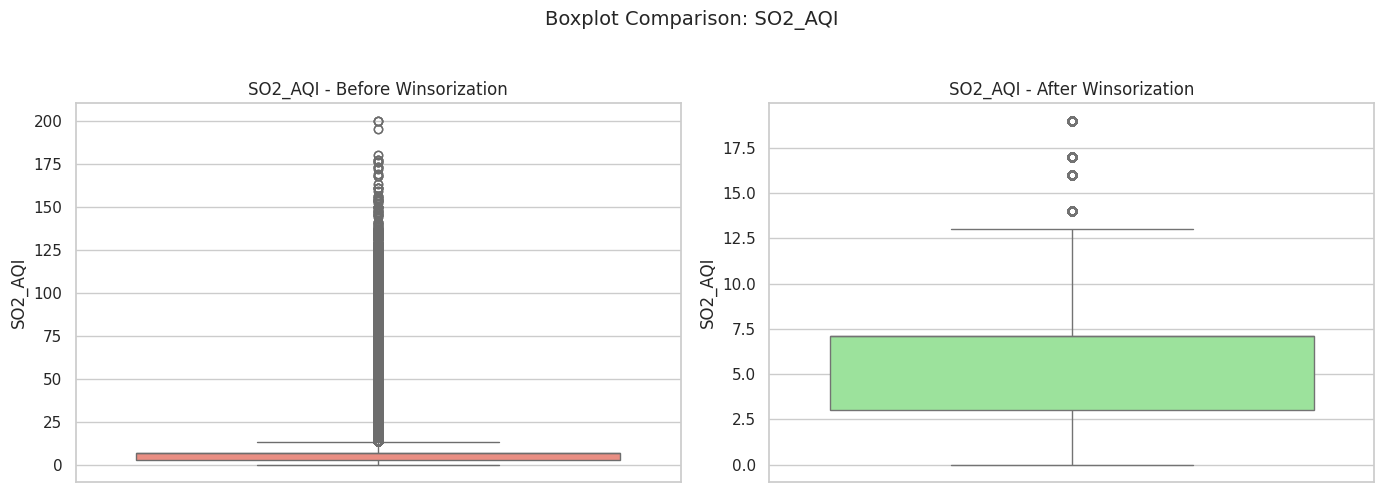

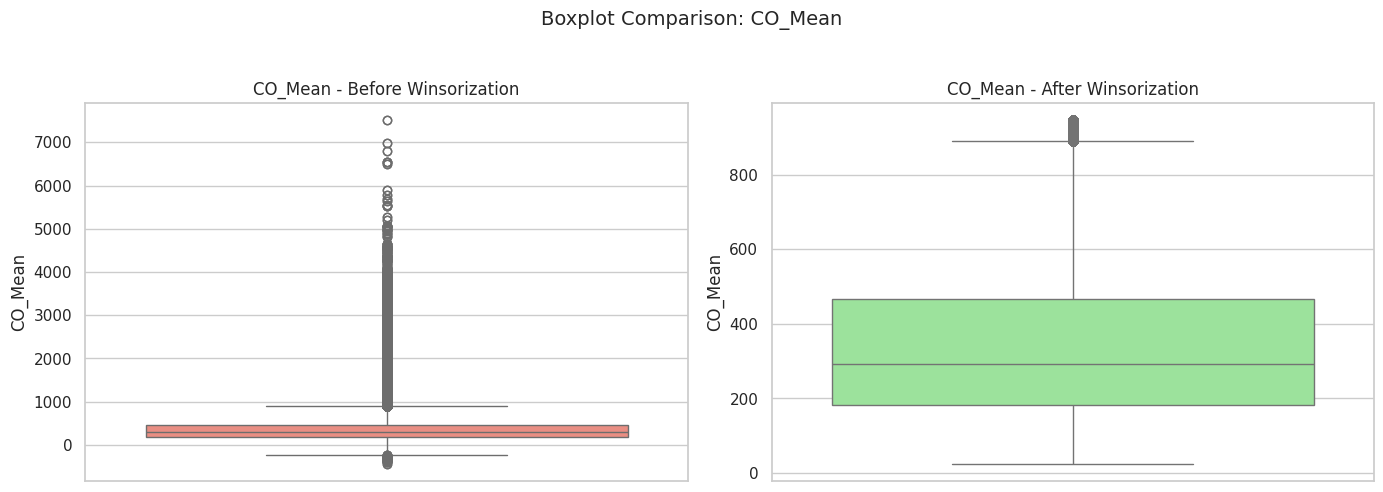

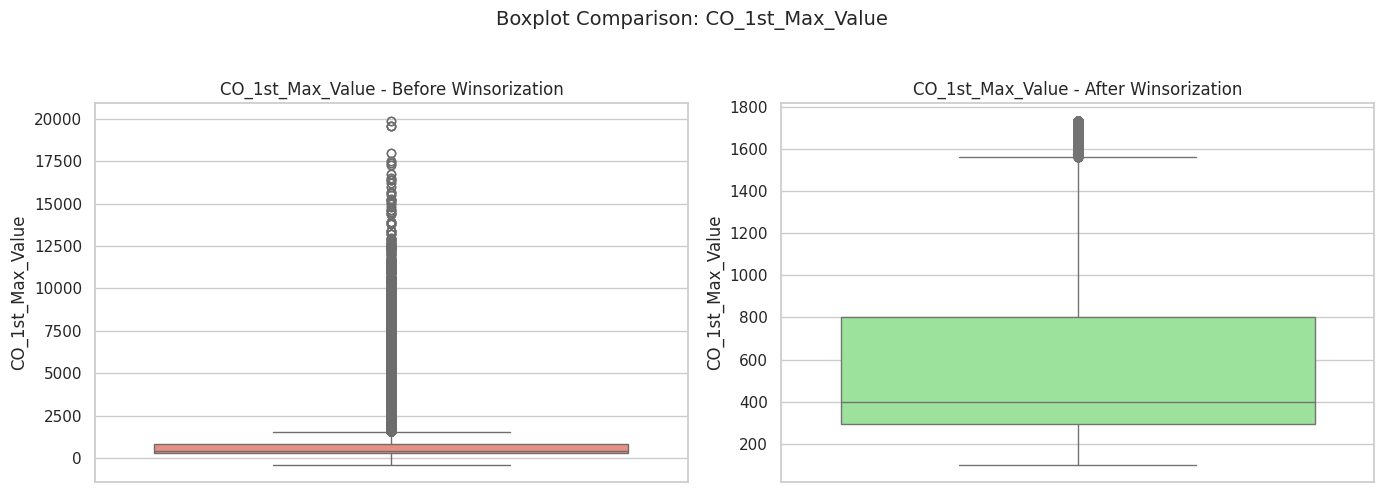

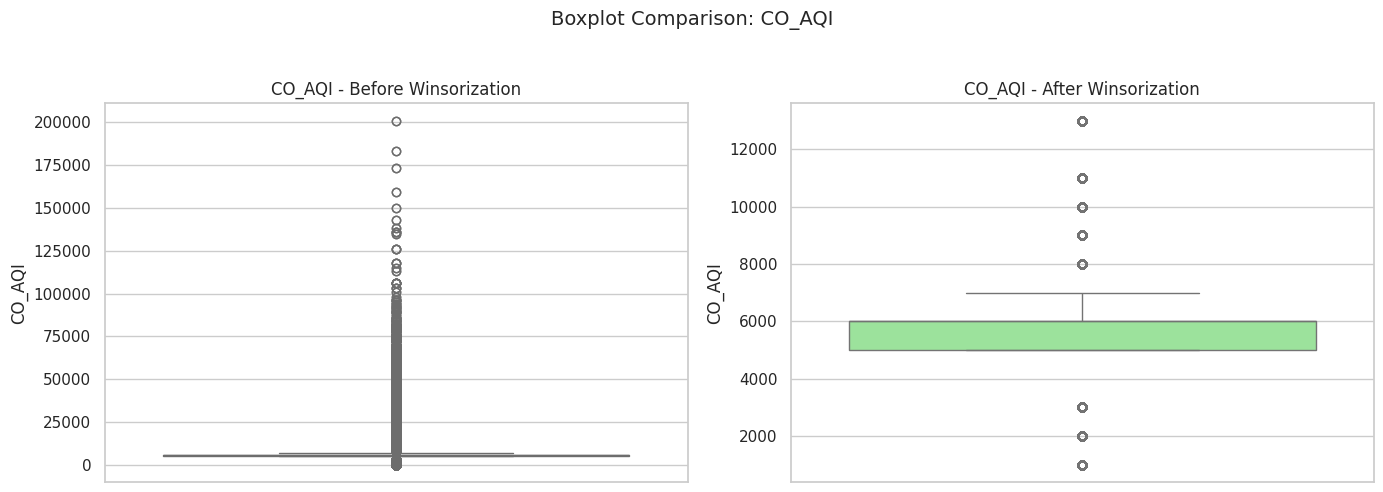

In [68]:
df_winsorized = apply_winsorization(df_clean_4_columns,
                                      cols_interes_not_O3_1st_Max_Value_O3_Mean, limits=(0.05, 0.05))

compare_boxplots(df_clean_4_columns, df_winsorized, cols_interes_not_O3_1st_Max_Value_O3_Mean)

In [69]:
# 2. Definir X e y
target = "O3_AQI"
X = df_winsorized.drop(columns=[target])
y = df_winsorized[target]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalar datos solo para modelos lineales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
lr_winsorized = LinearRegression()
# Linear Regression
lr_winsorized.fit(X_train_scaled, y_train)
lr_preds_winsorized = lr_winsorized.predict(X_test_scaled)
lr_r2_winsorized = r2_score(y_test, lr_preds_winsorized)
print(f"📊 Linear Regression R²: {lr_r2_winsorized:.4f}")

📊 Linear Regression R²: 0.1901


In [74]:
ridge_winsorized = Ridge(alpha=1.0)
# Ridge Regression
ridge_winsorized.fit(X_train_scaled, y_train)
ridge_preds_winsorized = ridge_winsorized.predict(X_test_scaled)
ridge_r2_winsorized = r2_score(y_test, ridge_preds_winsorized)
print(f"📊 Ridge Regression R²: {ridge_r2_winsorized:.4f}")

📊 Ridge Regression R²: 0.1631


In [75]:
from xgboost import XGBRegressor
xgb_winsorized = XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=10,
    reg_lambda=3,
    random_state=42,
    verbosity=1
)
# XGBoost
xgb_winsorized.fit(X_train, y_train)
xgb_preds_winsorized = xgb_winsorized.predict(X_test)
xgb_r2_winsorized = r2_score(y_test, xgb_preds_winsorized)
print(f"📊 XGBoost R²: {xgb_r2_winsorized:.4f}")

📊 XGBoost R²: 0.7768


In [76]:
from catboost import CatBoostRegressor

# Inicializar CatBoost con hiperparámetros razonables
cat_model_winsorized = CatBoostRegressor(
    iterations=200,
    learning_rate=0.2,
    depth=10,
    random_seed=42,
    verbose=0  # Silencia salida extensa
)

# Entrenar CatBoost
cat_model_winsorized.fit(X_train, y_train)

# Predecir
cat_preds_winsorized = cat_model_winsorized.predict(X_test)

# Evaluar
cat_mse_winsorized = mean_squared_error(y_test, cat_preds_winsorized)
cat_r2_winsorized = r2_score(y_test, cat_preds_winsorized)

print(f"CatBoost - MSE: {cat_mse_winsorized:.4f}")
print(f"CatBoost - R²:  {cat_r2_winsorized:.4f}")


CatBoost - MSE: 70301102.9975
CatBoost - R²:  0.6705


Bibliografía

European Environment Agency (EEA)
European Union Air Quality Standards
https://www.eea.europa.eu/themes/air/air-quality-standards

World Health Organization (WHO)
WHO Global Air Quality Guidelines (2021)
https://www.who.int/publications/i/item/9789240034228

United States Environmental Protection Agency (EPA)
National Ambient Air Quality Standards (NAAQS)
https://www.epa.gov/naaqs

European Commission
Directive 2008/50/EC on ambient air quality and cleaner air for Europe
https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32008L0050

U.S. AQI (Air Quality Index) Guide
https://www.airnow.gov/aqi/aqi-basics/

European AQI (Common Air Quality Index, CAQI)
https://www.airqualitynow.eu/about_indices_definition.php

World Health Organization (WHO) (2006)
Air quality guidelines: global update 2005
https://www.euro.who.int/__data/assets/pdf_file/0005/78638/E90038.pdf

Diez, S., et al. (2022). Air pollution measurement errors: is your data fit for purpose? Atmospheric Measurement Techniques, 15, 4091–4105. https://doi.org/10.5194/amt-15-4091-2022
amt.copernicus.org

U.S. Environmental Protection Agency (EPA). (2021). Best Practices for Review and Validation of Ambient Air Monitoring Data. https://www.epa.gov/system/files/documents/2021-10/data-validation-guidance-document-final-august-2021.pdf
epa.gov

EPA. (2020). Quality Assurance Handbook for Air Pollution Measurement Systems. https://www.epa.gov/sites/default/files/2020-10/documents/final_handbook_document_1_17.pdf
epa.gov

Zoi Environment Network. (2023). Air Quality Monitoring and Data Management Guidebook. https://zoinet.org/wp-content/uploads/2023/02/Air-quality-monitoring_EN.pdf
zoinet.org

New Zealand Ministry for the Environment. (2009). Good Practice Guide for Air Quality Monitoring and Data Management. https://environment.govt.nz/assets/Publications/Files/good-practice-guide-for-air-quality.pdf
environment.govt.nz

Comparación de modelos: Regresión Lineal, Random Forest y LightGBM
En este estudio, se aplicaron tres algoritmos de regresión distintos sobre el mismo conjunto de datos, cuyo objetivo era predecir el índice de calidad del aire basado en ozono (O3_AQI) a partir de variables meteorológicas, contaminantes y características geográficas. Los modelos evaluados fueron: Regresión Lineal, Random Forest y LightGBM (una variante eficiente de los árboles de decisión en gradiente).

1. Regresión Lineal
La regresión lineal se utilizó como modelo base debido a su simplicidad y facilidad de interpretación. A pesar de su naturaleza lineal, logró obtener resultados sorprendentemente buenos con un R² promedio de 0.91 en validación cruzada, lo que indica una relación lineal fuerte entre las variables predictoras y la variable objetivo. Este resultado sugiere que parte de la variabilidad en O3_AQI puede explicarse mediante relaciones lineales simples, lo cual ya es un buen punto de partida.

2. Random Forest
El modelo de Random Forest mostró un ajuste prácticamente perfecto, con un R² de 1.00 en el conjunto de test y valores muy similares en entrenamiento. Esto es indicativo de un modelo extremadamente preciso, pero también levanta preocupaciones sobre sobreajuste (overfitting). Aunque los resultados son impresionantes, es importante recordar que Random Forest puede memorizar patrones complejos, especialmente si no se ajustan adecuadamente hiperparámetros como la profundidad de los árboles o el número de muestras mínimas por hoja. A pesar de esto, la validación cruzada confirmó un rendimiento igualmente alto, lo que sugiere que el modelo está aprendiendo patrones reales en los datos y no solo ruido.

3. LightGBM
LightGBM fue el modelo más eficiente en términos de tiempo de entrenamiento y manejo de características categóricas tras el preprocesamiento adecuado. Este modelo también logró un R² cercano a 1.00 en test y validación cruzada, y ofreció una buena capacidad para interpretar la importancia de las variables. De hecho, las variables más importantes según LightGBM coincidían con las que presentaban mayor correlación con O3_AQI, lo que valida la coherencia del enfoque. Además, se construyó una curva de aprendizaje que evidenció un buen comportamiento del modelo al aumentar el tamaño del conjunto de entrenamiento, sin señales claras de sobreajuste.

Conclusión comparativa
Los tres modelos presentan un rendimiento muy alto en este problema, lo que indica que el dataset posee una alta capacidad predictiva respecto a O3_AQI. Mientras que la regresión lineal proporciona una base interpretativa sólida, los modelos no lineales (Random Forest y LightGBM) capturan relaciones más complejas, logrando mayor precisión. LightGBM se posiciona como el modelo más recomendable por su eficiencia, rendimiento y capacidad de interpretación, siempre que se evite el sobreajuste mediante validación adecuada y control de hiperparámetros.



Regresión Lineal (con regularización Ridge/Lasso/ElasticNet):

alpha: fuerza de la regularización (ej. 0.01 a 100)

tipo de regularización: L1 (Lasso), L2 (Ridge) o ambas (ElasticNet)

Random Forest:

n_estimators: número de árboles (ej. 100, 200)

max_depth: profundidad máxima del árbol (ej. 10, 20, None)

min_samples_split: mínimo número de muestras para dividir un nodo (ej. 2, 5)

min_samples_leaf: mínimo número de muestras en una hoja (ej. 1, 2)

max_features: número de características consideradas en cada división (ej. 'auto', 'sqrt')

LightGBM:

num_leaves: número de hojas por árbol (ej. 31, 50, 100)

learning_rate: tasa de aprendizaje (ej. 0.01, 0.05, 0.1)

n_estimators: número de árboles (ej. 100, 500, 1000)

max_depth: profundidad máxima (ej. -1 para sin límite, 10, 20)

min_data_in_leaf: mínimo número de datos en hoja (ej. 20, 50, 100)

feature_fraction: fracción de características usadas por árbol (ej. 0.6, 0.8, 1.0)

bagging_fraction y bagging_freq: muestreo de datos y frecuencia (ej. 0.6, 0.8, 1.0 y 0, 5, 10)